___

<a href='http://www.dourthe.tech'> <img src='Dourthe_Technologies_Headers.png' /></a>
___
<center><em>For more information, visit <a href='http://www.dourthe.tech'>www.dourthe.tech</a></em></center>

# Motion Capture Enhancement using Sequence Modeling and Recurrent Neural Network

___
## Objective
Train a Recurrent Neural Network (RNN) to enhance the performance of the Microsoft Kinect 3D camera. More specifically, the model's aim is to learn the mapping from Kinect joint centers trajectories to Vicon* joint angles.

_*multi-camera marker-based motion capture technology, considered here as Gold Standard_

**Simplified model architecture:**

<img src="img/architecture_example.jpg" alt="Drawing" style="width: 500px;"/>

___
## Dataset
The data were collected at the Department of Physical Therapy, University of Toronto, Toronto, ON, Canada. This study was approved by the Research Ethics Boards (REB) at Sunnybrook Health Sciences Centre (Ref: 367-2015), Ryerson University (Ref: 2015-346-2) and the University of Toronto (Ref: 37914). Twenty-five varsity volleyball and basketball student-athletes were recruited from a university population (14 male, age 18-23, BMI 20.0-26.3 and 12 female, age 17-23, BMI 21.1-30.4). A total of 48 retroreflective markers (16 calibration markers and 32 dynamic markers) were placed on the trunk, pelvis, thighs, shins, and feet of each participant.

Five calibration trials were recorded with all markers, including one standing static and four functional calibration trials (to facilitate the calculation of right and left knee and hip axes/joint centers). Once all calibration trials had been recorded, the 16 calibration markers were removed and each participant performed 15 standardized tasks in the following order: 3 drop vertical jump (DVJ) trials, 6 distance single-legged hop (SLH) tests (3 for each leg) during which the participant had to hop as far as possible while ensuring a stable landing, and 6 timed SLH (3 for each leg) during which the participant had to hop 2.5 meters as quickly as possible (see illustration below). For each task, motion tracking was recorded simultaneously with Vicon and Kinect (aligned with frontal plane). Synchronization between Vicon and Kinect data was ensured by triggering data collection with a voltage pulse, detected by a USB analogue digital converter (National Instruments, USA).

<img src="img/trials.jpg" alt="Drawing" style="width: 500px;"/>

The data from a total of 367* trials were compiled into a CSV file named V-vs-K_data, which has the following structure:

| Column name | Description | Unit | Technology |
|:---|:---|:---|:---|
| participant | Participant ID |  |  |
| trial_cat | Trial category** (DVJ, RDist, LDist, RTimed, LTimed) |  |  |
| trial_id | Unique ID attributed for each trial |  |  |
| V_RHip_x | X-axis trajectory of the Right Hip | meters | Vicon |
| V_RHip_y | Y-axis trajectory of the Right Hip | meters | Vicon |
| V_RHip_z | Z-axis trajectory of the Right Hip | meters | Vicon |
| V_RKnee_x | X-axis trajectory of the Right Knee | meters | Vicon |
| V_RKnee_y | Y-axis trajectory of the Right Knee | meters | Vicon |
| V_RAnkle_z | Z-axis trajectory of the Right Knee | meters | Vicon |
| V_RAnkle_x | X-axis trajectory of the Right Ankle | meters | Vicon |
| V_RAnkle_y | Y-axis trajectory of the Right Ankle | meters | Vicon |
| V_RAnkle_z | Z-axis trajectory of the Right Ankle | meters | Vicon |
| V_LHip_x | X-axis trajectory of the Left Hip | meters | Vicon |
| V_LHip_y | Y-axis trajectory of the Left Hip | meters | Vicon |
| V_LHip_z | Z-axis trajectory of the Left Hip | meters | Vicon |
| V_LKnee_x | X-axis trajectory of the Left Knee | meters | Vicon |
| V_LKnee_y | Y-axis trajectory of the Left Knee | meters | Vicon |
| V_LAnkle_z | Z-axis trajectory of the Left Knee | meters | Vicon |
| V_LAnkle_x | X-axis trajectory of the Left Ankle | meters | Vicon |
| V_LAnkle_y | Y-axis trajectory of the Left Ankle | meters | Vicon |
| V_LAnkle_z | Z-axis trajectory of the Left Ankle | meters | Vicon |
| K_RHip_x | X-axis trajectory of the Right Hip | meters | Kinect |
| K_RHip_y | Y-axis trajectory of the Right Hip | meters | Kinect |
| K_RHip_z | Z-axis trajectory of the Right Hip | meters | Kinect |
| K_RKnee_x | X-axis trajectory of the Right Knee | meters | Kinect |
| K_RKnee_y | Y-axis trajectory of the Right Knee | meters | Kinect |
| K_RAnkle_z | Z-axis trajectory of the Right Knee | meters | Kinect |
| K_RAnkle_x | X-axis trajectory of the Right Ankle | meters | Kinect |
| K_RAnkle_y | Y-axis trajectory of the Right Ankle | meters | Kinect |
| K_RAnkle_z | Z-axis trajectory of the Right Ankle | meters | Kinect |
| K_LHip_x | X-axis trajectory of the Left Hip | meters | Kinect |
| K_LHip_y | Y-axis trajectory of the Left Hip | meters | Kinect |
| K_LHip_z | Z-axis trajectory of the Left Hip | meters | Kinect |
| K_LKnee_x | X-axis trajectory of the Left Knee | meters | Kinect |
| K_LKnee_y | Y-axis trajectory of the Left Knee | meters | Kinect |
| K_LAnkle_z | Z-axis trajectory of the Left Knee | meters | Kinect |
| K_LAnkle_x | X-axis trajectory of the Left Ankle | meters | Kinect |
| K_LAnkle_y | Y-axis trajectory of the Left Ankle | meters | Kinect |
| K_LAnkle_z | Z-axis trajectory of the Left Ankle | meters | Kinect |
| V_RHip_fl | Target Right Hip flexion angle time series | degrees | Vicon |
| V_RKnee_fl | Target Right Knee flexion angle time series | degrees | Vicon |
| V_RKnee_ab | Target Right Knee abduction angle time series | degrees | Vicon |
| V_LHip_fl | Target Left Hip flexion angle time series | degrees | Vicon |
| V_LKnee_fl | Target Left Knee flexion angle time series | degrees | Vicon |
| V_LKnee_ab | Target Left Knee abduction angle time series | degrees | Vicon |
| V_KASR | Target Knee-to-Ankle Separation Ratio time series | degrees | Vicon |
| K_RHip_fl | Original Right Hip flexion angle time series (before enhancement, for comparison) | degrees | Kinect |
| K_RKnee_fl | Original Right Knee flexion angle time series (before enhancement, for comparison) | degrees | Kinect |
| K_RKnee_ab | Original Right Knee abduction angle time series (before enhancement, for comparison) | degrees | Kinect |
| K_LHip_fl | Original Left Hip flexion angle time series (before enhancement, for comparison) | degrees | Kinect |
| K_LKnee_fl | Original Left Knee flexion angle time series (before enhancement, for comparison) | degrees | Kinect |
| K_LKnee_ab | Original Left Knee abduction angle time series (before enhancement, for comparison) | degrees | Kinect |
| K_KASR | Original Knee-to-Ankle Separation Ratio time series (before enhancement, for comparison) | degrees | Kinect |

*_Some trial files had technical issues, which is why the dataset has a total of 367 trials, which is different from 25 participants x 15 trials = 375_

**_RDist and LDist stand for Right and Left Distance SLH - RTimed and LTimed stand for Right and Left Timed SLH_

___
## Libraries Imports
### Data manipulation and analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

### Data visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Machine learning

In [3]:
# Time series segmentation
from seglearn.transform import SegmentXY, last

# Split data between training and test set
from sklearn.model_selection import train_test_split

# Deep-learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

# Callbacks definition
from tensorflow.keras.callbacks import EarlyStopping

# Model evaluation
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

# Model import
from tensorflow.keras.models import load_model

___
## Data Import

In [82]:
mocap = pd.read_csv('V-vs-K_cropped_data.csv')

___
## Exploratory Data Analysis
### General
**Display the first few rows of the dataset.**

In [83]:
mocap.head()

,participant,trial_cat,trial_id,V_RHip_x,V_RHip_y,V_RHip_z,V_RKnee_x,V_RKnee_y,V_RKnee_z,V_RAnkle_x,...,V_LKnee_fl,V_LKnee_ab,V_KASR,K_RHip_fl,K_RKnee_fl,K_RKnee_ab,K_LHip_fl,K_LKnee_fl,K_LKnee_ab,K_KASR
0,1,DVJ,101,-0.013648,-0.055241,1.150129,0.044382,-0.073271,0.760009,0.089072,...,30.19313,3.98558,1.168059,15.951227,0.469488,2.697340,2.574903,14.258212,10.019172,0.662479
1,1,DVJ,101,-0.008258,-0.056431,1.150479,0.049172,-0.073771,0.760209,0.091542,...,32.57716,5.39632,1.224637,16.608858,0.577640,3.157216,4.822200,16.444892,11.189592,0.682549
2,1,DVJ,101,-0.002918,-0.057671,1.150419,0.054262,-0.074551,0.760269,0.093802,...,35.95590,6.14378,1.240851,17.175995,0.727044,3.558857,7.156969,18.995911,12.448136,0.702345
3,1,DVJ,101,0.002332,-0.058341,1.149829,0.059242,-0.074831,0.759699,0.096072,...,39.28569,5.76745,1.255485,17.469660,0.916127,3.823930,9.207425,21.714899,13.673366,0.715971
4,1,DVJ,101,0.006902,-0.059441,1.148719,0.064162,-0.075461,0.758639,0.098142,...,43.13012,5.17259,1.275046,17.619730,1.113603,3.959396,11.007412,24.325839,14.816149,0.727588


**Confirm number of unique participants and trials:**

In [84]:
print('Number of participants:\t', mocap['participant'].nunique())
print('Number of trials:\t', mocap['trial_id'].nunique())

Number of participants:	 25
Number of trials:	 367


**Check the statistics of each motion capture column:**

In [85]:
mocap.drop(['participant', 'trial_id'], axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V_RHip_x,54465.0,0.066440,0.636149,-2.069980,-0.298269,0.113117,0.508492,2.104013
V_RHip_y,54465.0,-0.103669,0.067813,-0.369567,-0.141874,-0.105933,-0.067873,0.180165
V_RHip_z,54465.0,0.889698,0.165745,0.510157,0.782647,0.857804,0.954026,1.924906
V_RKnee_x,54465.0,0.226809,0.689473,-2.173560,-0.150133,0.274330,0.718801,2.233319
V_RKnee_y,54465.0,-0.100750,0.073475,-0.500680,-0.141075,-0.100075,-0.059843,0.243755
V_RKnee_z,54465.0,0.523718,0.153872,0.093187,0.419413,0.485386,0.583956,1.650666
V_RAnkle_x,54465.0,-0.003067,0.729990,-2.563606,-0.472162,0.102162,0.494923,2.042849
V_RAnkle_y,54465.0,-0.087241,0.086549,-0.602924,-0.139996,-0.087631,-0.036234,0.318535
V_RAnkle_z,54465.0,0.216900,0.186947,0.005652,0.053071,0.176576,0.328198,1.539536
V_LHip_x,54465.0,0.058194,0.638054,-2.070930,-0.303141,0.102658,0.500411,2.153353


### Missing data
**Check for missing data (expressed as a percentage of the dataset length).**

In [86]:
mocap.isnull().sum()*100/len(mocap)

participant     0.000000
trial_cat       0.000000
trial_id        0.000000
V_RHip_x        0.000000
V_RHip_y        0.000000
V_RHip_z        0.000000
V_RKnee_x       0.000000
V_RKnee_y       0.000000
V_RKnee_z       0.000000
V_RAnkle_x      0.000000
V_RAnkle_y      0.000000
V_RAnkle_z      0.000000
V_LHip_x        0.000000
V_LHip_y        0.000000
V_LHip_z        0.000000
V_LKnee_x       0.000000
V_LKnee_y       0.000000
V_LKnee_z       0.000000
V_LAnkle_x      0.000000
V_LAnkle_y      0.000000
V_LAnkle_z      0.000000
K_RHip_x        0.000000
K_RHip_y        0.000000
K_RHip_z        0.000000
K_RKnee_x       0.000000
K_RKnee_y       0.000000
K_RKnee_z       0.000000
K_RAnkle_x      0.000000
K_RAnkle_y      0.000000
K_RAnkle_z      0.000000
K_LHip_x        0.000000
K_LHip_y        0.000000
K_LHip_z        0.000000
K_LKnee_x       0.000000
K_LKnee_y       0.000000
K_LKnee_z       0.000000
K_LAnkle_x      0.000000
K_LAnkle_y      0.000000
K_LAnkle_z      0.000000
V_RHip_fl       0.000000


**NOTE**

The fact that close to 84% of the V_KASR and K_KASR data are missing is completely normal. The Knee-to-Ankle Separation Ratio (KASR) is a metric that only makes sense during a Drop-Vertical Jump (DVJ) trial, where both legs are used symetrically. During all other trials (Right and Left Single-legged Hop Tests), measuring KASR would not make sense, which is why there are no data for most trials (as only 3 trials out of 15 per participant are DVJ).

___
## MODEL 1 - Mapping from Right Joint Centers tracking (Kinect) to Right Knee Flexion angle (Vicon).

__
### Input/Target data selection.

_Note: we will also save the corresponding Kinect calculation of the target angle for future comparison, which are all the columns that start with an O._

In [87]:
mocap.columns

Index(['participant', 'trial_cat', 'trial_id', 'V_RHip_x', 'V_RHip_y',
       'V_RHip_z', 'V_RKnee_x', 'V_RKnee_y', 'V_RKnee_z', 'V_RAnkle_x',
       'V_RAnkle_y', 'V_RAnkle_z', 'V_LHip_x', 'V_LHip_y', 'V_LHip_z',
       'V_LKnee_x', 'V_LKnee_y', 'V_LKnee_z', 'V_LAnkle_x', 'V_LAnkle_y',
       'V_LAnkle_z', 'K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x',
       'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z',
       'K_LHip_x', 'K_LHip_y', 'K_LHip_z', 'K_LKnee_x', 'K_LKnee_y',
       'K_LKnee_z', 'K_LAnkle_x', 'K_LAnkle_y', 'K_LAnkle_z', 'V_RHip_fl',
       'V_RKnee_fl', 'V_RKnee_ab', 'V_LHip_fl', 'V_LKnee_fl', 'V_LKnee_ab',
       'V_KASR', 'K_RHip_fl', 'K_RKnee_fl', 'K_RKnee_ab', 'K_LHip_fl',
       'K_LKnee_fl', 'K_LKnee_ab', 'K_KASR'],
      dtype='object')

**Next, we can isolate the columns that we plan to use as Input and Target:**

_Note: we also need to keep the id column as it will be used during the segmentation process._

In [88]:
input_columns = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z']
target_columns = ['V_RKnee_fl', 'K_RKnee_fl']

In [89]:
X = mocap[['trial_id'] + input_columns]
y = mocap[['trial_id'] + target_columns]

In [90]:
X.head()

,trial_id,K_RHip_x,K_RHip_y,K_RHip_z,K_RKnee_x,K_RKnee_y,K_RKnee_z,K_RAnkle_x,K_RAnkle_y,K_RAnkle_z
0,101,-0.074342,-0.044867,1.183386,-0.005411,-0.092430,0.703189,0.042408,-0.115068,0.333022
1,101,-0.070361,-0.045803,1.183965,0.000885,-0.093987,0.706826,0.046416,-0.115092,0.331425
2,101,-0.066308,-0.046810,1.184344,0.006153,-0.095285,0.711787,0.049764,-0.115177,0.329850
3,101,-0.061735,-0.047941,1.184391,0.009746,-0.095993,0.716482,0.052396,-0.115369,0.328200
4,101,-0.056916,-0.049123,1.184120,0.012613,-0.096306,0.719314,0.054388,-0.115713,0.326413


In [91]:
y.head()

,trial_id,V_RKnee_fl,K_RKnee_fl
0,101,9.92101,0.469488
1,101,10.10273,0.577640
2,101,10.36430,0.727044
3,101,10.62582,0.916127
4,101,11.04225,1.113603


__
### Train/Validation split
**Split the data into training and validation sets:**

First, we need to specify our validation size:

_Note: since the dataset is small, we will reduce the validation size to 20%._

In [102]:
val_size = 0.2

Next, we need to check how many trials to include in the training and test sets based on the defined test size.

In [103]:
n_unique_trials = X['trial_id'].nunique()
n_train_trials = int(n_unique_trials*(1-val_size))
n_val_trials = int(n_unique_trials*val_size)

print('Validation size:\t\t', int(val_size*100), '%')
print('Total number of trials:\t\t', X['trial_id'].nunique())
print('Number of training trials:\t', n_train_trials)
print('Number of validation trials:\t', n_val_trials)

Validation size:		 20 %
Total number of trials:		 367
Number of training trials:	 293
Number of validation trials:	 73


Then, we can create a list of unique trial IDs, shuffle it and divide it into lists of training and validation trial IDs.

In [104]:
id_list = X['trial_id'].unique()

In [105]:
np.random.seed(42)
np.random.shuffle(id_list)

In [106]:
id_list_train = id_list[:n_train_trials]
id_list_val = id_list[n_train_trials:]

Finally, we can define our training and validation sets using the list of trial IDs.

In [107]:
X_train = X[X['trial_id'].isin(id_list_train)]
X_val = X[X['trial_id'].isin(id_list_val)]
y_train = y[y['trial_id'].isin(id_list_train)]
y_val = y[y['trial_id'].isin(id_list_val)]

__
### Data segmentation

**For this sequence model, the data will be segmented using a sliding window with defined _width_ and _step size_ and use each segment to try and predict the last target value of the corresponding target data.**

The _width_ corresponds to the number of input observations per segment and the _step size_ defines by how many observations is the sliding window moving between segments.

**EXAMPLE:** a _width_ of 20 and a _step size_ of 1 indicates that each segment will contain 20 input observations from the joint centers trajectories and move by 1 time step between segments, as shown in the illustration below (simplified by using only 3 times series as input):
<img src="img/sliding_window.jpg" alt="Drawing" style="width: 500px;"/>

**First, we need to isolate the numerical values of the dataset (as Keras deals with numpy arrays and not pandas dataframes).**

In [108]:
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

**Then, we need to create a list of length n (= number of trials), where each element in the list is a numpy array of shape (l, c):**

Where:
* l = number of observations in trial
* c = number of columns/channels

In [109]:
# Initialization
X_train_trials_list = []
y_train_trials_list = []
y_train_trials_id_list = []
X_val_trials_list = []
y_val_trials_list = []
y_val_trials_id_list = []

# Isolate each unique trial data as a numpy array and append it to the trials list
for i in np.unique(X_train[:,0]): 
    Xi = X_train[X_train[:,0] == i, 1:]
    X_train_trials_list.append(Xi)
    yi = y_train[y_train[:,0] == i, 1:]
    y_train_trials_list.append(yi)
    idi = y_train[y_train[:,0] == i, 0]
    y_train_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

for i in np.unique(X_val[:,0]): 
    Xi = X_val[X_val[:,0] == i, 1:]
    X_val_trials_list.append(Xi)
    yi = y_val[y_val[:,0] == i, 1:]
    y_val_trials_list.append(yi)
    idi = y_val[y_val[:,0] == i, 0]
    y_val_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

We can save the length of each trial in a separate list:

In [110]:
train_trials_length = [len(x) for x in X_train_trials_list]
val_trials_length = [len(x) for x in X_val_trials_list]

**Next step is to convert the list of trials into a numpy array (that Keras can process):**

In [111]:
X_train_trials_array = np.array(X_train_trials_list)
y_train_trials_array = np.array(y_train_trials_list)
y_train_trials_id_array = np.array(y_train_trials_id_list)
X_val_trials_array = np.array(X_val_trials_list)
y_val_trials_array = np.array(y_val_trials_list)
y_val_trials_id_array = np.array(y_val_trials_id_list)

Before moving forward, we now need to isolate the actual target data (i.e. Vicon angle) from the Kinect angle, which will only be used during model evaluation.

In [112]:
y_train_trials_array_target = np.array([y_train_trials_array[:][x][:,0] for x in range(len(y_train_trials_array))])
y_train_trials_array_kinect = np.array([y_train_trials_array[:][x][:,1] for x in range(len(y_train_trials_array))])
y_val_trials_array_target = np.array([y_val_trials_array[:][x][:,0] for x in range(len(y_val_trials_array))])
y_val_trials_array_kinect = np.array([y_val_trials_array[:][x][:,1] for x in range(len(y_val_trials_array))])

**Now we can segment the data using the SegmentXY function from seglearn.**

We will start by defining our segmentation parameters, which should be based on the min, mean and max trial length.

In [113]:
print('Mean trial length:\t', np.round(np.mean([train_trials_length + val_trials_length])))
print('Min trial length:\t', np.min([train_trials_length + val_trials_length]))
print('Max trial length:\t', np.max([train_trials_length + val_trials_length]))

Mean trial length:	 148.0
Min trial length:	 36
Max trial length:	 284


We can see that there is a wide range of trial length. Since the shortest trial only has 28 observations, we will select a segmentation width of 10, which means that about 30% of the shortest trial would be lost, as each target will be predicted based on trajectories build using the 10 previous observations.

_Note: decreasing the segmentation width will increase the resolution on the target data (by allowing more target points to be predicted) but will also result is smaller segments, which means that the model will have less data to find potential patterns._

In [114]:
step_size = 1
segmentation_width = 10

Then, we will create an instance of the SegmentXY class:

In [115]:
seg = SegmentXY(step=step_size, width=segmentation_width, order='C', y_func=last)

Finally, we can apply the corresponding segmentation transform to our data:

In [116]:
X_train, y_train, _ = seg.transform(X_train_trials_array, y_train_trials_array_target)
_, y_train_kinect, _ = seg.transform(X_train_trials_array, y_train_trials_array_kinect)
_, y_train_id, _ = seg.transform(X_train_trials_array, y_train_trials_id_array)
X_val, y_val, _ = seg.transform(X_val_trials_array, y_val_trials_array_target)
_, y_val_kinect, _ = seg.transform(X_val_trials_array, y_val_trials_array_kinect)
_, y_val_id, _ = seg.transform(X_val_trials_array, y_val_trials_id_array)

**Now that the data has been segmented, we can check the total number of segments:**

In [117]:
print('TRAINING DATA')
print('Number of segments:\t\t', X_train.shape[0])
print('Percentage of the dataset:\t', np.round(X_train.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_train.shape[1])
print('Number of input channels:\t', X_train.shape[2])
print('\n')
print('VALIDATION DATA')
print('Number of segments:\t\t', X_val.shape[0])
print('Percentage of the dataset:\t', np.round(X_val.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_val.shape[1])
print('Number of input channels:\t', X_val.shape[2])

TRAINING DATA
Number of segments:		 40872
Percentage of the dataset:	 79.89 %
Segments width:			 10
Number of input channels:	 9


VALIDATION DATA
Number of segments:		 10290
Percentage of the dataset:	 20.11 %
Segments width:			 10
Number of input channels:	 9


_Note: the training and validation ratios are not exactly 80% and 20% because we are splitting based on full trials instead of a defined number of segments._

__
### Model training
**First, let's create an EarlyStopping callback that will stop the training of the model based on the evolution of the validation loss.**

In [118]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

**Next, we can define a custom optimizer.**

We will choose the Adam optimizer and choose the learning rate.

_Note: a larger learning rate appears to help the model locate regions of general, large-scale optima, while a smaller rate helps the model focus on one particular local optimum. In other words, if the model stops training with large losses, it probably means that the learning rate is too small._

In [119]:
learning_rate = 0.001

In [120]:
opt = Adam(lr=learning_rate)

**Then, we can define and compile the model.**

_Note: we will choose a number of LSTM units that is double the size of the segmentation width, which should be enough to allow the network to capture potential patterns from segments._

In [121]:
# Define model
model = Sequential()
model.add(Bidirectional(LSTM(20), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
# Compile model
model.compile(optimizer=opt, loss='mse')

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 40)                4800      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 4,841
Trainable params: 4,841
Non-trainable params: 0
_________________________________________________________________


**Now, let's train the model on the training data.**

_Note: Since there are more than 30,000 segments in the training data, we will choose a fairly large batch size. In addition, since we implemented an EarlyStopping callback, we will select a very large number of epochs._

In [123]:
model.fit(X_train, y_train, 
          batch_size=1024,
          epochs=5000,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Train on 40872 samples, validate on 10290 samples
Epoch 1/5000
40872/40872 [==============================] - 6s 138us/sample - loss: 5365.9778 - val_loss: 5038.6490
Epoch 2/5000
40872/40872 [==============================] - 3s 67us/sample - loss: 4874.3860 - val_loss: 4416.8695
Epoch 3/5000
40872/40872 [==============================] - 3s 67us/sample - loss: 4243.3109 - val_loss: 3894.4925
Epoch 4/5000
40872/40872 [==============================] - 3s 67us/sample - loss: 3874.3123 - val_loss: 3627.0927
Epoch 5/5000
40872/40872 [==============================] - 3s 69us/sample - loss: 3650.2178 - val_loss: 3435.9911
Epoch 6/5000
40872/40872 [==============================] - 3s 67us/sample - loss: 3470.6765 - val_loss: 3268.5560
Epoch 7/5000
40872/40872 [==============================] - 3s 70us/sample - loss: 3309.8524 - val_loss: 3116.9522
Epoch 8/5000
40872/40872 [==============================] - 3s 66us/sample - loss: 3162.9264 - val_loss: 2977.4379
Epoch 9/5000
40872/40872 [===

40872/40872 [==============================] - 3s 68us/sample - loss: 600.9835 - val_loss: 565.7317
Epoch 72/5000
40872/40872 [==============================] - 3s 68us/sample - loss: 576.3311 - val_loss: 564.1720
Epoch 73/5000
40872/40872 [==============================] - 3s 72us/sample - loss: 551.8948 - val_loss: 525.0554
Epoch 74/5000
40872/40872 [==============================] - 3s 70us/sample - loss: 529.1266 - val_loss: 497.5443
Epoch 75/5000
40872/40872 [==============================] - 3s 68us/sample - loss: 508.7483 - val_loss: 487.2644
Epoch 76/5000
40872/40872 [==============================] - 3s 67us/sample - loss: 489.2478 - val_loss: 468.9867
Epoch 77/5000
40872/40872 [==============================] - 3s 67us/sample - loss: 472.9529 - val_loss: 463.6413
Epoch 78/5000
40872/40872 [==============================] - 3s 67us/sample - loss: 456.8789 - val_loss: 443.4219
Epoch 79/5000
40872/40872 [==============================] - 3s 68us/sample - loss: 440.8724 - val_los

**Save the model.**

In [124]:
model.save('RKnee_fl.h5')

__
### Model evaluation
**We will start by creating a DataFrame containing the training history of the model and report the final training and validation losses.**

In [125]:
losses = pd.DataFrame(model.history.history)
losses.columns = ['training loss', 'validation loss']
print('Final training loss:\t', np.round(np.sqrt(losses['training loss'].iloc[-1]),2), 'deg\t[RMSE]')
print('Final validation loss:\t', np.round(np.sqrt(losses['validation loss'].iloc[-1]),2), 'deg\t[RMSE]')

Final training loss:	 14.3 deg	[RMSE]
Final validation loss:	 16.58 deg	[RMSE]


**Next, we can plot the training history.**

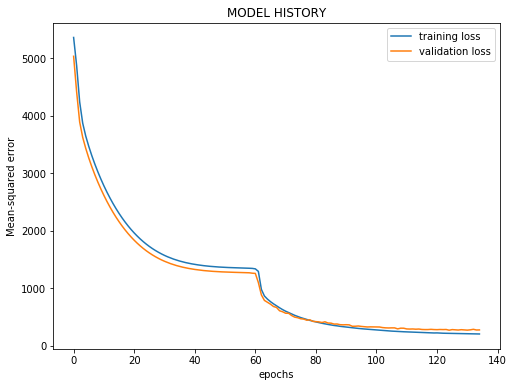

In [126]:
losses.plot(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Mean-squared error')
plt.title('MODEL HISTORY')
plt.show()

**Now, let's generate predictions.**

In [127]:
predictions = model.predict(X_val)

**For visual assessment, we can plot a sample of the validation data and the corresponding predictions.**

First, we will select a random sample from the validation data:

In [128]:
sample_size = 1000
start_idx = int(np.random.randint(0, len(y_val)-sample_size, 1))
end_idx = int(start_idx + sample_size)

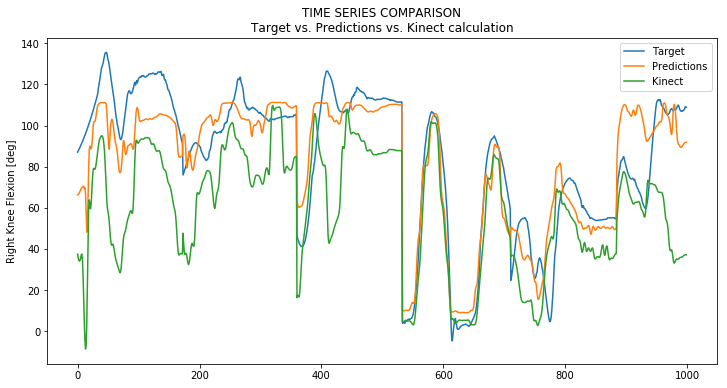

In [129]:
plt.figure(figsize=(12,6))
plt.plot(y_val[start_idx:end_idx], label='Target')
plt.plot(predictions[start_idx:end_idx], label='Predictions')
plt.plot(y_val_kinect[start_idx:end_idx], label='Kinect')
plt.ylabel('Right Knee Flexion [deg]')
plt.title('TIME SERIES COMPARISON\nTarget vs. Predictions vs. Kinect calculation')
plt.legend()
plt.show()

**We can also isolate each validation trial and calculate the corresponding peak knee flexion to evaluate the performance of the model.**

First, we need to find the indices where each new trial begins.

In [130]:
y_train_id_list, y_train_id_idx = np.unique(y_train_id, return_index=True)
y_val_id_list, y_val_id_idx = np.unique(y_val_id, return_index=True)

Next, we will copy a function that was created to calculate the Intraclass Correlation Coefficient (ICC) using the Two-way Mixed Model* for Case 3 **

_*defined by Patrick E. Shrout and Joseph L. Fleiss. “Intraclass Correlations: Uses in assessing rater reliability.” Psychological Bulletin 86.2 (2979): 420-428_

_** In Case 3, each target/subject/observation is rated by each of the same m observers/judges/methods, who are the only observers/judges/methods of interest_

In [131]:
def ICC_2way_mixed(data):
    '''
    Calculate the Intraclass Correlation Coefficient (ICC) using the Two-way Mixed Model for Case 3* defined by Patrick E. Shrout and Joseph L. Fleiss. “Intraclass Correlations: Uses in assessing rater reliability.” Psychological Bulletin 86.2 (2979): 420-428
        *In Case 3, each target/subject/observation is rated by each of the same m observers/judges/methods, who are the only observers/judges/methods of interest.
    Input:
        data: mxn array where m is the number of rows (each row is a measurement/observation/subject) and where n is the number of observers/judges/methods.
    Output:
        ICC: intraclass correlation coeeficient (3,1)
        df_m: number of degrees of freedom (df) between observers/judges/methods
        df_n: number of degrees of freedom (df) between measurements/observations/subjects
        F_stat: F-Statistic - session effect (calculated as the ratio between the vartiation between sample means and the variation within samples - i.e. ratio of two quantities that are expected to be roughly equal under the null hypothesis)
        var_obs: variance between measurements/observations/subjects
        MSE: mean squared error (calculated as the sum of squared error divided by the number of degrees of freedom between measurements/observations/subjects: SSE/df_n)
    Dependencies:
        None
    '''

    # Compute data shape and degrees of freedom
    [num_n, num_m] = data.shape
    df_m = num_m - 1
    df_n0 = num_n - 1
    df_n = df_n0 * df_m

    # Compute the sum of distance to the mean
    mean_data = np.mean(data)
    sum_dist_mean = ((data - mean_data)**2).sum()

    # Create the design matrix for the different levels
    x = np.kron(np.eye(num_m), np.ones((num_n, 1)))
    x0 = np.tile(np.eye(num_n), (num_m, 1))
    X = np.hstack([x, x0])

    # Computer the Sum of Squared Error
    predicted_data = np.dot(np.dot(np.dot(X, np.linalg.pinv(np.dot(X.T, X))), X.T), data.flatten('F'))
    residuals = data.flatten('F') - predicted_data
    SSE = (residuals**2).sum()
    residuals.shape = data.shape

    # Compute the Mean Squared Error (MSE)
    MSE = SSE / df_n

    # Compute the F-statistic (session effect) - between observers/judges/methods (columns)
    SSC = ((np.mean(data, 0) - mean_data)**2).sum() * num_n
    MSC = SSC / df_m / num_n
    F_stat = MSC / MSE

    # Computer the subject effect - between measurements/observations/subjects (rows)
    SSR = sum_dist_mean - SSC - SSE
    MSR = SSR / df_n0

    # Compute variance between subjects
    var_obs = (MSR - MSE) / num_m

    # Computer ICC(3,1)
    ICC = (MSR - MSE) / (MSR + df_m * MSE)

    return ICC, df_m, df_n, F_stat, var_obs, MSE

Finally, we can calculate peak knee flexion for each trial of the validation set and calculate the corresponding ICCs.

In [132]:
val_target_peak, val_predic_peak, val_kinect_peak = [], [], []

for i in y_val_id_idx[:len(y_val_id_idx)]:
    target_peaki = np.max(y_val[i:i+1])
    predic_peaki = np.max(predictions[i:i+1])
    kinect_peaki = np.max(y_val_kinect[i:i+1])
    val_target_peak.append(target_peaki)    
    val_predic_peak.append(predic_peaki)
    val_kinect_peak.append(kinect_peaki)
val_ICC_predict, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_predic_peak]))
val_ICC_kinect, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_kinect_peak]))

**Print model evaluation report and compare model performance to the original Kinect calculation.**

In [133]:
print('MODEL EVALUATION REPORT')
print('\n')
print('Target vs. Model Predictions')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, predictions),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, predictions),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, predictions),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, predictions),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, predictions)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, predictions))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak flexion angles:\t\t', np.round(val_ICC_predict,3))
print('\n')
print('Target vs. Kinect Calculation')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, y_val_kinect),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, y_val_kinect),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, y_val_kinect),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, y_val_kinect),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak flexion angles:\t\t', np.round(val_ICC_kinect,3))

MODEL EVALUATION REPORT


Target vs. Model Predictions
	R2 score:				 78.48 	%
	Explained variance score:		 78.62 	%
	Mean absolute error:			 11.47 	deg
	Mean squared error:			 274.98 deg2
	Root mean squared error:		 16.58 	deg
	Relative root mean squared error:	 10.27 	% [of the target range]


	ICC on peak flexion angles:		 0.891


Target vs. Kinect Calculation
	R2 score:				 26.29 	%
	Explained variance score:		 55.72 	%
	Mean absolute error:			 22.2 	deg
	Mean squared error:			 941.88 deg2
	Root mean squared error:		 30.69 	deg
	Relative root mean squared error:	 19.01 	% [of the target range]


	ICC on peak flexion angles:		 0.777


__
### Conclusion (Model 1)
The RNN model outperformed the original Kinect calculation by showing large improvements on all evaluation metrics. More specifically, the R2 and explained variance scores were significantly improved, and all errors were largely decreases.

**This shows that the RNN model was able to learn the mapping from Kinect Joint Centers tracking to Vicon Right Knee Flexion Angle.**

___
## MODEL 2 - Mapping from Right Joint Centers tracking (Kinect) to Right Knee Abduction angle (Vicon).
_Note: since this model will follow the exact same steps as the first model, this section will be less commented._

__
### Input/Target data selection.

In [134]:
input_columns = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z']
target_columns = ['V_RKnee_ab', 'K_RKnee_ab']
X = mocap[['trial_id'] + input_columns]
y = mocap[['trial_id'] + target_columns]

__
### Train/Validation split

In [135]:
val_size = 0.2

n_unique_trials = X['trial_id'].nunique()
n_train_trials = int(n_unique_trials*(1-val_size))
n_val_trials = int(n_unique_trials*val_size)

print('Validation size:\t\t', int(val_size*100), '%')
print('Total number of trials:\t\t', X['trial_id'].nunique())
print('Number of training trials:\t', n_train_trials)
print('Number of validation trials:\t', n_val_trials)

id_list = X['trial_id'].unique()

np.random.seed(42)
np.random.shuffle(id_list)

id_list_train = id_list[:n_train_trials]
id_list_val = id_list[n_train_trials:]

X_train = X[X['trial_id'].isin(id_list_train)]
X_val = X[X['trial_id'].isin(id_list_val)]
y_train = y[y['trial_id'].isin(id_list_train)]
y_val = y[y['trial_id'].isin(id_list_val)]

Validation size:		 20 %
Total number of trials:		 367
Number of training trials:	 293
Number of validation trials:	 73


__
### Data segmentation

In [136]:
step_size = 1
segmentation_width = 10

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

# Initialization
X_train_trials_list = []
y_train_trials_list = []
y_train_trials_id_list = []
X_val_trials_list = []
y_val_trials_list = []
y_val_trials_id_list = []

# Isolate each unique trial data as a numpy array and append it to the trials list
for i in np.unique(X_train[:,0]): 
    Xi = X_train[X_train[:,0] == i, 1:]
    X_train_trials_list.append(Xi)
    yi = y_train[y_train[:,0] == i, 1:]
    y_train_trials_list.append(yi)
    idi = y_train[y_train[:,0] == i, 0]
    y_train_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

for i in np.unique(X_val[:,0]): 
    Xi = X_val[X_val[:,0] == i, 1:]
    X_val_trials_list.append(Xi)
    yi = y_val[y_val[:,0] == i, 1:]
    y_val_trials_list.append(yi)
    idi = y_val[y_val[:,0] == i, 0]
    y_val_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)
        
train_trials_length = [len(x) for x in X_train_trials_list]
val_trials_length = [len(x) for x in X_val_trials_list]

X_train_trials_array = np.array(X_train_trials_list)
y_train_trials_array = np.array(y_train_trials_list)
y_train_trials_id_array = np.array(y_train_trials_id_list)
X_val_trials_array = np.array(X_val_trials_list)
y_val_trials_array = np.array(y_val_trials_list)
y_val_trials_id_array = np.array(y_val_trials_id_list)

y_train_trials_array_target = np.array([y_train_trials_array[:][x][:,0] for x in range(len(y_train_trials_array))])
y_train_trials_array_kinect = np.array([y_train_trials_array[:][x][:,1] for x in range(len(y_train_trials_array))])
y_val_trials_array_target = np.array([y_val_trials_array[:][x][:,0] for x in range(len(y_val_trials_array))])
y_val_trials_array_kinect = np.array([y_val_trials_array[:][x][:,1] for x in range(len(y_val_trials_array))])

seg = SegmentXY(step=step_size, width=segmentation_width, order='C', y_func=last)

X_train, y_train, _ = seg.transform(X_train_trials_array, y_train_trials_array_target)
_, y_train_kinect, _ = seg.transform(X_train_trials_array, y_train_trials_array_kinect)
_, y_train_id, _ = seg.transform(X_train_trials_array, y_train_trials_id_array)
X_val, y_val, _ = seg.transform(X_val_trials_array, y_val_trials_array_target)
_, y_val_kinect, _ = seg.transform(X_val_trials_array, y_val_trials_array_kinect)
_, y_val_id, _ = seg.transform(X_val_trials_array, y_val_trials_id_array)

print('TRAINING DATA')
print('Number of segments:\t\t', X_train.shape[0])
print('Percentage of the dataset:\t', np.round(X_train.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_train.shape[1])
print('Number of input channels:\t', X_train.shape[2])
print('\n')
print('VALIDATION DATA')
print('Number of segments:\t\t', X_val.shape[0])
print('Percentage of the dataset:\t', np.round(X_val.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_val.shape[1])
print('Number of input channels:\t', X_val.shape[2])

TRAINING DATA
Number of segments:		 40872
Percentage of the dataset:	 79.89 %
Segments width:			 10
Number of input channels:	 9


VALIDATION DATA
Number of segments:		 10290
Percentage of the dataset:	 20.11 %
Segments width:			 10
Number of input channels:	 9


__
### Model training

In [137]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

learning_rate = 0.001
opt = Adam(lr=learning_rate)

# Define model
model = Sequential()
model.add(Bidirectional(LSTM(20), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
# Compile model
model.compile(optimizer=opt, loss='mse')

model.fit(X_train, y_train, 
          batch_size=1024,
          epochs=5000,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Train on 40872 samples, validate on 10290 samples
Epoch 1/5000
40872/40872 [==============================] - 6s 147us/sample - loss: 308.9718 - val_loss: 183.7921
Epoch 2/5000
40872/40872 [==============================] - 3s 77us/sample - loss: 277.8574 - val_loss: 168.2145
Epoch 3/5000
40872/40872 [==============================] - 3s 75us/sample - loss: 265.3825 - val_loss: 169.2239
Epoch 4/5000
40872/40872 [==============================] - 3s 74us/sample - loss: 263.6883 - val_loss: 169.4998
Epoch 5/5000
40872/40872 [==============================] - 3s 73us/sample - loss: 261.1205 - val_loss: 169.6242
Epoch 6/5000
40872/40872 [==============================] - 3s 74us/sample - loss: 257.8881 - val_loss: 167.7327
Epoch 7/5000
40872/40872 [==============================] - 3s 74us/sample - loss: 251.8903 - val_loss: 164.6412
Epoch 8/5000
40872/40872 [==============================] - 3s 75us/sample - loss: 243.0301 - val_loss: 159.3036
Epoch 9/5000
40872/40872 [===================

**Save the model.**

In [138]:
model.save('RKnee_ab.h5')

__
### Model evaluation

Final training loss:	 14.47 deg	[RMSE]
Final validation loss:	 12.9 deg	[RMSE]


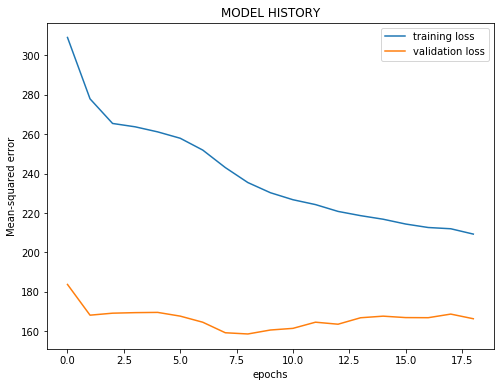

In [139]:
losses = pd.DataFrame(model.history.history)
losses.columns = ['training loss', 'validation loss']
print('Final training loss:\t', np.round(np.sqrt(losses['training loss'].iloc[-1]),2), 'deg\t[RMSE]')
print('Final validation loss:\t', np.round(np.sqrt(losses['validation loss'].iloc[-1]),2), 'deg\t[RMSE]')

losses.plot(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Mean-squared error')
plt.title('MODEL HISTORY')
plt.show()

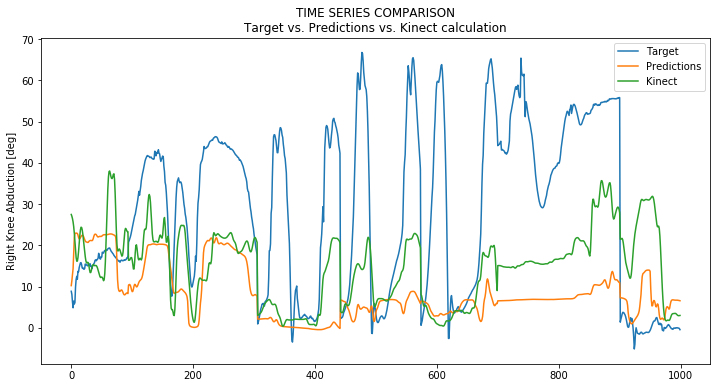

In [140]:
predictions = model.predict(X_val)

sample_size = 1000
start_idx = int(np.random.randint(0, len(y_val)-sample_size, 1))
end_idx = int(start_idx + sample_size)

plt.figure(figsize=(12,6))
plt.plot(y_val[start_idx:end_idx], label='Target')
plt.plot(predictions[start_idx:end_idx], label='Predictions')
plt.plot(y_val_kinect[start_idx:end_idx], label='Kinect')
plt.ylabel('Right Knee Abduction [deg]')
plt.title('TIME SERIES COMPARISON\nTarget vs. Predictions vs. Kinect calculation')
plt.legend()
plt.show()

In [141]:
y_train_id_list, y_train_id_idx = np.unique(y_train_id, return_index=True)
y_val_id_list, y_val_id_idx = np.unique(y_val_id, return_index=True)

val_target_peak, val_predic_peak, val_kinect_peak = [], [], []

for i in y_val_id_idx[:len(y_val_id_idx)]:
    target_peaki = np.max(y_val[i:i+1])
    predic_peaki = np.max(predictions[i:i+1])
    kinect_peaki = np.max(y_val_kinect[i:i+1])
    val_target_peak.append(target_peaki)    
    val_predic_peak.append(predic_peaki)
    val_kinect_peak.append(kinect_peaki)
val_ICC_predict, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_predic_peak]))
val_ICC_kinect, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_kinect_peak]))

print('MODEL EVALUATION REPORT')
print('\n')
print('Target vs. Model Predictions')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, predictions),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, predictions),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, predictions),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, predictions),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, predictions)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, predictions))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_predict,3))
print('\n')
print('Target vs. Kinect Calculation')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, y_val_kinect),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, y_val_kinect),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, y_val_kinect),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, y_val_kinect),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_kinect,3))

MODEL EVALUATION REPORT


Target vs. Model Predictions
	R2 score:				 0.56 	%
	Explained variance score:		 0.88 	%
	Mean absolute error:			 8.55 	deg
	Mean squared error:			 166.41 deg2
	Root mean squared error:		 12.9 	deg
	Relative root mean squared error:	 15.43 	% [of the target range]


	ICC on peak abduction angles:		 0.158


Target vs. Kinect Calculation
	R2 score:				 -173.19 	%
	Explained variance score:		 -92.13 	%
	Mean absolute error:			 16.03 	deg
	Mean squared error:			 457.16 deg2
	Root mean squared error:		 21.38 	deg
	Relative root mean squared error:	 25.57 	% [of the target range]


	ICC on peak abduction angles:		 -0.042


__
### Conclusion (Model 2)
The RNN model led to a large reduction of all errors, and also large improvements were observed in terms of R2 and explained variance scores or in ICC on peak abduction angles.

**The RNN model was again able to do a better job at learning the mapping from Kinect Joint Centers tracking to Vicon Right Knee Abduction Angle compared to the angle calculation implementation of Kinect.**

___
## MODEL 3 - Mapping from Joint Centers Tracking (Kinect) to Knee Flexion Angle (Vicon).
**The difference between Model 3 and Model 1 is that we will combine right and left leg data to multiply the length of our dataset by two.**

Since all trials were performed with the participant aligned with the global coordinate system, where the participant's sagittal plane should be mostly aligned with the X-Z plane of the global coordinate system, we can simply mirror the data from the left leg to make it look like additional right leg data.

**Due to the chosen orientation, the mirroring only consist of multiplying the y-axis data from the left leg by a factor of -1.**

_Note: since the angle data are already all following the same sign reference, no need to mirror them._

__
### Input/Target data selection.

In [142]:
input_columns_R = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z']
input_columns_L = ['K_LHip_x', 'K_LHip_y', 'K_LHip_z', 'K_LKnee_x', 'K_LKnee_y', 'K_LKnee_z', 'K_LAnkle_x', 'K_LAnkle_y', 'K_LAnkle_z']

target_columns_R = ['V_RKnee_fl', 'K_RKnee_fl']
target_columns_L = ['V_LKnee_fl', 'K_LKnee_fl']

X_R = mocap[['trial_id'] + input_columns_R]
X_L = mocap[['trial_id'] + input_columns_L]
y_R = mocap[['trial_id'] + target_columns_R]
y_L = mocap[['trial_id'] + target_columns_L]

**Currently, right and left leg data have the same trial IDs, which needs to be distinct.**

In [143]:
X_R['trial_id'] = mocap['trial_id'].apply(lambda id: id+.01)
X_L['trial_id'] = mocap['trial_id'].apply(lambda id: id+.02)
y_R['trial_id'] = mocap['trial_id'].apply(lambda id: id+.01)
y_L['trial_id'] = mocap['trial_id'].apply(lambda id: id+.02)

**Next, we need to mirror the left leg data by multiplying all y-axis data by -1.**

In [144]:
X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']] = X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']]*-1

**Finally, we need to rename the columns of the right and left leg data and concatenate them to form only one X and y dataframes.**

In [145]:
X_RL_combined_columns = ['trial_id', 'K_Hip_x', 'K_Hip_y', 'K_Hip_z', 'K_Knee_x', 'K_Knee_y', 'K_Knee_z', 'K_Ankle_x', 'K_Ankle_y', 'K_Ankle_z']
X_R.columns = X_RL_combined_columns
X_L.columns = X_RL_combined_columns

y_RL_combined_columns = ['trial_id', 'V_Knee_fl', 'K_Knee_fl']
y_R.columns = y_RL_combined_columns
y_L.columns = y_RL_combined_columns

In [146]:
X = pd.concat([X_R, X_L])
y = pd.concat([y_R, y_L])

__
### Train/Validation split

In [147]:
val_size = 0.2

n_unique_trials = X['trial_id'].nunique()
n_train_trials = int(n_unique_trials*(1-val_size))
n_val_trials = int(n_unique_trials*val_size)

print('Validation size:\t\t', int(val_size*100), '%')
print('Total number of trials:\t\t', X['trial_id'].nunique())
print('Number of training trials:\t', n_train_trials)
print('Number of validation trials:\t', n_val_trials)

id_list = X['trial_id'].unique()

np.random.seed(42)
np.random.shuffle(id_list)

id_list_train = id_list[:n_train_trials]
id_list_val = id_list[n_train_trials:]

X_train = X[X['trial_id'].isin(id_list_train)]
X_val = X[X['trial_id'].isin(id_list_val)]
y_train = y[y['trial_id'].isin(id_list_train)]
y_val = y[y['trial_id'].isin(id_list_val)]

Validation size:		 20 %
Total number of trials:		 734
Number of training trials:	 587
Number of validation trials:	 146


__
### Data segmentation

In [148]:
step_size = 1
segmentation_width = 10

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

# Initialization
X_train_trials_list = []
y_train_trials_list = []
y_train_trials_id_list = []
X_val_trials_list = []
y_val_trials_list = []
y_val_trials_id_list = []

# Isolate each unique trial data as a numpy array and append it to the trials list
for i in np.unique(X_train[:,0]): 
    Xi = X_train[X_train[:,0] == i, 1:]
    X_train_trials_list.append(Xi)
    yi = y_train[y_train[:,0] == i, 1:]
    y_train_trials_list.append(yi)
    idi = y_train[y_train[:,0] == i, 0]
    y_train_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

for i in np.unique(X_val[:,0]): 
    Xi = X_val[X_val[:,0] == i, 1:]
    X_val_trials_list.append(Xi)
    yi = y_val[y_val[:,0] == i, 1:]
    y_val_trials_list.append(yi)
    idi = y_val[y_val[:,0] == i, 0]
    y_val_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)
        
train_trials_length = [len(x) for x in X_train_trials_list]
val_trials_length = [len(x) for x in X_val_trials_list]

X_train_trials_array = np.array(X_train_trials_list)
y_train_trials_array = np.array(y_train_trials_list)
y_train_trials_id_array = np.array(y_train_trials_id_list)
X_val_trials_array = np.array(X_val_trials_list)
y_val_trials_array = np.array(y_val_trials_list)
y_val_trials_id_array = np.array(y_val_trials_id_list)

y_train_trials_array_target = np.array([y_train_trials_array[:][x][:,0] for x in range(len(y_train_trials_array))])
y_train_trials_array_kinect = np.array([y_train_trials_array[:][x][:,1] for x in range(len(y_train_trials_array))])
y_val_trials_array_target = np.array([y_val_trials_array[:][x][:,0] for x in range(len(y_val_trials_array))])
y_val_trials_array_kinect = np.array([y_val_trials_array[:][x][:,1] for x in range(len(y_val_trials_array))])

seg = SegmentXY(step=step_size, width=segmentation_width, order='C', y_func=last)

X_train, y_train, _ = seg.transform(X_train_trials_array, y_train_trials_array_target)
_, y_train_kinect, _ = seg.transform(X_train_trials_array, y_train_trials_array_kinect)
_, y_train_id, _ = seg.transform(X_train_trials_array, y_train_trials_id_array)
X_val, y_val, _ = seg.transform(X_val_trials_array, y_val_trials_array_target)
_, y_val_kinect, _ = seg.transform(X_val_trials_array, y_val_trials_array_kinect)
_, y_val_id, _ = seg.transform(X_val_trials_array, y_val_trials_id_array)

print('TRAINING DATA')
print('Number of segments:\t\t', X_train.shape[0])
print('Percentage of the dataset:\t', np.round(X_train.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_train.shape[1])
print('Number of input channels:\t', X_train.shape[2])
print('\n')
print('VALIDATION DATA')
print('Number of segments:\t\t', X_val.shape[0])
print('Percentage of the dataset:\t', np.round(X_val.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_val.shape[1])
print('Number of input channels:\t', X_val.shape[2])

TRAINING DATA
Number of segments:		 81933
Percentage of the dataset:	 80.07 %
Segments width:			 10
Number of input channels:	 9


VALIDATION DATA
Number of segments:		 20391
Percentage of the dataset:	 19.93 %
Segments width:			 10
Number of input channels:	 9


__
### Model training

In [149]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

learning_rate = 0.001
opt = Adam(lr=learning_rate)

# Define model
model = Sequential()
model.add(Bidirectional(LSTM(20), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
# Compile model
model.compile(optimizer=opt, loss='mse')

model.fit(X_train, y_train, 
          batch_size=1024,
          epochs=5000,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Train on 81933 samples, validate on 20391 samples
Epoch 1/5000
81933/81933 [==============================] - 10s 126us/sample - loss: 5348.7956 - val_loss: 4429.6772
Epoch 2/5000
81933/81933 [==============================] - 7s 84us/sample - loss: 4362.1766 - val_loss: 3746.7343
Epoch 3/5000
81933/81933 [==============================] - 7s 84us/sample - loss: 3874.9038 - val_loss: 3383.5549
Epoch 4/5000
81933/81933 [==============================] - 7s 83us/sample - loss: 3524.7869 - val_loss: 3083.2588
Epoch 5/5000
81933/81933 [==============================] - 7s 85us/sample - loss: 3224.9488 - val_loss: 2823.2479
Epoch 6/5000
81933/81933 [==============================] - 7s 84us/sample - loss: 2962.0874 - val_loss: 2595.6164
Epoch 7/5000
81933/81933 [==============================] - 7s 83us/sample - loss: 2732.2832 - val_loss: 2397.1592
Epoch 8/5000
81933/81933 [==============================] - 7s 87us/sample - loss: 2528.7796 - val_loss: 2222.8093
Epoch 9/5000
81933/81933 [==

Epoch 72/5000
81933/81933 [==============================] - 7s 87us/sample - loss: 268.5990 - val_loss: 391.3685
Epoch 73/5000
81933/81933 [==============================] - 7s 86us/sample - loss: 270.2106 - val_loss: 362.9374
Epoch 74/5000
81933/81933 [==============================] - 7s 89us/sample - loss: 259.0027 - val_loss: 353.7761
Epoch 75/5000
81933/81933 [==============================] - 7s 87us/sample - loss: 254.1096 - val_loss: 354.9414
Epoch 76/5000
81933/81933 [==============================] - 7s 87us/sample - loss: 252.8501 - val_loss: 353.2785
Epoch 77/5000
81933/81933 [==============================] - 7s 87us/sample - loss: 250.8182 - val_loss: 359.7398
Epoch 78/5000
81933/81933 [==============================] - 7s 87us/sample - loss: 249.4107 - val_loss: 351.9733
Epoch 79/5000
81933/81933 [==============================] - 7s 88us/sample - loss: 246.3616 - val_loss: 358.9873
Epoch 80/5000
81933/81933 [==============================] - 7s 88us/sample - loss: 244.

**Save the model.**

In [150]:
model.save('Knee_fl.h5')

__
### Model evaluation

Final training loss:	 15.1 deg	[RMSE]
Final validation loss:	 18.79 deg	[RMSE]


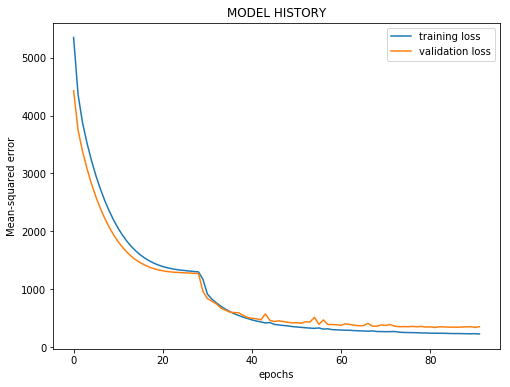

In [151]:
losses = pd.DataFrame(model.history.history)
losses.columns = ['training loss', 'validation loss']
print('Final training loss:\t', np.round(np.sqrt(losses['training loss'].iloc[-1]),2), 'deg\t[RMSE]')
print('Final validation loss:\t', np.round(np.sqrt(losses['validation loss'].iloc[-1]),2), 'deg\t[RMSE]')

losses.plot(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Mean-squared error')
plt.title('MODEL HISTORY')
plt.show()

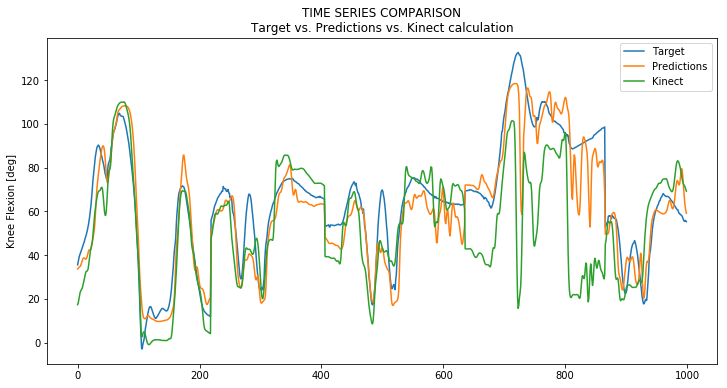

In [152]:
predictions = model.predict(X_val)

sample_size = 1000
start_idx = int(np.random.randint(0, len(y_val)-sample_size, 1))
end_idx = int(start_idx + sample_size)

plt.figure(figsize=(12,6))
plt.plot(y_val[start_idx:end_idx], label='Target')
plt.plot(predictions[start_idx:end_idx], label='Predictions')
plt.plot(y_val_kinect[start_idx:end_idx], label='Kinect')
plt.ylabel('Knee Flexion [deg]')
plt.title('TIME SERIES COMPARISON\nTarget vs. Predictions vs. Kinect calculation')
plt.legend()
plt.show()

In [153]:
y_train_id_list, y_train_id_idx = np.unique(y_train_id, return_index=True)
y_val_id_list, y_val_id_idx = np.unique(y_val_id, return_index=True)

val_target_peak, val_predic_peak, val_kinect_peak = [], [], []

for i in y_val_id_idx[:len(y_val_id_idx)]:
    target_peaki = np.max(y_val[i:i+1])
    predic_peaki = np.max(predictions[i:i+1])
    kinect_peaki = np.max(y_val_kinect[i:i+1])
    val_target_peak.append(target_peaki)    
    val_predic_peak.append(predic_peaki)
    val_kinect_peak.append(kinect_peaki)
val_ICC_predict, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_predic_peak]))
val_ICC_kinect, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_kinect_peak]))

print('MODEL EVALUATION REPORT')
print('\n')
print('Target vs. Model Predictions')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, predictions),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, predictions),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, predictions),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, predictions),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, predictions)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, predictions))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak flexion angles:\t\t', np.round(val_ICC_predict,3))
print('\n')
print('Target vs. Kinect Calculation')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, y_val_kinect),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, y_val_kinect),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, y_val_kinect),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, y_val_kinect),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak flexion angles:\t\t', np.round(val_ICC_kinect,3))

MODEL EVALUATION REPORT


Target vs. Model Predictions
	R2 score:				 72.51 	%
	Explained variance score:		 72.68 	%
	Mean absolute error:			 12.02 	deg
	Mean squared error:			 353.09 deg2
	Root mean squared error:		 18.79 	deg
	Relative root mean squared error:	 10.2 	% [of the target range]


	ICC on peak flexion angles:		 0.885


Target vs. Kinect Calculation
	R2 score:				 27.19 	%
	Explained variance score:		 52.75 	%
	Mean absolute error:			 22.5 	deg
	Mean squared error:			 935.06 deg2
	Root mean squared error:		 30.58 	deg
	Relative root mean squared error:	 16.59 	% [of the target range]


	ICC on peak flexion angles:		 0.808


__
### Conclusion (Model 3)
No improvement observed after augmenting the data by mirroring the left leg and combining right and left sides.

___
## MODEL 4 - Mapping from Joint Centers Tracking (Kinect) to Knee Abduction Angle (Vicon).
**Following the approach of Model 3, let's see if augmenting the data by mirroring the left leg and combining right and left sides will improve the performance of the model when trying to predict knee abduction angle.**

__
### Input/Target data selection.

In [154]:
input_columns_R = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z']
input_columns_L = ['K_LHip_x', 'K_LHip_y', 'K_LHip_z', 'K_LKnee_x', 'K_LKnee_y', 'K_LKnee_z', 'K_LAnkle_x', 'K_LAnkle_y', 'K_LAnkle_z']

target_columns_R = ['V_RKnee_ab', 'K_RKnee_ab']
target_columns_L = ['V_LKnee_ab', 'K_LKnee_ab']

X_R = mocap[['trial_id'] + input_columns_R]
X_L = mocap[['trial_id'] + input_columns_L]
y_R = mocap[['trial_id'] + target_columns_R]
y_L = mocap[['trial_id'] + target_columns_L]

X_R['trial_id'] = mocap['trial_id'].apply(lambda id: id+.01)
X_L['trial_id'] = mocap['trial_id'].apply(lambda id: id+.02)
y_R['trial_id'] = mocap['trial_id'].apply(lambda id: id+.01)
y_L['trial_id'] = mocap['trial_id'].apply(lambda id: id+.02)

X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']] = X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']]*-1

X_RL_combined_columns = ['trial_id', 'K_Hip_x', 'K_Hip_y', 'K_Hip_z', 'K_Knee_x', 'K_Knee_y', 'K_Knee_z', 'K_Ankle_x', 'K_Ankle_y', 'K_Ankle_z']
X_R.columns = X_RL_combined_columns
X_L.columns = X_RL_combined_columns

y_RL_combined_columns = ['trial_id', 'V_Knee_ab', 'K_Knee_ab']
y_R.columns = y_RL_combined_columns
y_L.columns = y_RL_combined_columns

X = pd.concat([X_R, X_L])
y = pd.concat([y_R, y_L])

__
### Train/Validation split

In [155]:
val_size = 0.2

n_unique_trials = X['trial_id'].nunique()
n_train_trials = int(n_unique_trials*(1-val_size))
n_val_trials = int(n_unique_trials*val_size)

print('Validation size:\t\t', int(val_size*100), '%')
print('Total number of trials:\t\t', X['trial_id'].nunique())
print('Number of training trials:\t', n_train_trials)
print('Number of validation trials:\t', n_val_trials)

id_list = X['trial_id'].unique()

np.random.seed(42)
np.random.shuffle(id_list)

id_list_train = id_list[:n_train_trials]
id_list_val = id_list[n_train_trials:]

X_train = X[X['trial_id'].isin(id_list_train)]
X_val = X[X['trial_id'].isin(id_list_val)]
y_train = y[y['trial_id'].isin(id_list_train)]
y_val = y[y['trial_id'].isin(id_list_val)]

Validation size:		 20 %
Total number of trials:		 734
Number of training trials:	 587
Number of validation trials:	 146


__
### Data segmentation

In [156]:
step_size = 1
segmentation_width = 10

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

# Initialization
X_train_trials_list = []
y_train_trials_list = []
y_train_trials_id_list = []
X_val_trials_list = []
y_val_trials_list = []
y_val_trials_id_list = []

# Isolate each unique trial data as a numpy array and append it to the trials list
for i in np.unique(X_train[:,0]): 
    Xi = X_train[X_train[:,0] == i, 1:]
    X_train_trials_list.append(Xi)
    yi = y_train[y_train[:,0] == i, 1:]
    y_train_trials_list.append(yi)
    idi = y_train[y_train[:,0] == i, 0]
    y_train_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

for i in np.unique(X_val[:,0]): 
    Xi = X_val[X_val[:,0] == i, 1:]
    X_val_trials_list.append(Xi)
    yi = y_val[y_val[:,0] == i, 1:]
    y_val_trials_list.append(yi)
    idi = y_val[y_val[:,0] == i, 0]
    y_val_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)
        
train_trials_length = [len(x) for x in X_train_trials_list]
val_trials_length = [len(x) for x in X_val_trials_list]

X_train_trials_array = np.array(X_train_trials_list)
y_train_trials_array = np.array(y_train_trials_list)
y_train_trials_id_array = np.array(y_train_trials_id_list)
X_val_trials_array = np.array(X_val_trials_list)
y_val_trials_array = np.array(y_val_trials_list)
y_val_trials_id_array = np.array(y_val_trials_id_list)

y_train_trials_array_target = np.array([y_train_trials_array[:][x][:,0] for x in range(len(y_train_trials_array))])
y_train_trials_array_kinect = np.array([y_train_trials_array[:][x][:,1] for x in range(len(y_train_trials_array))])
y_val_trials_array_target = np.array([y_val_trials_array[:][x][:,0] for x in range(len(y_val_trials_array))])
y_val_trials_array_kinect = np.array([y_val_trials_array[:][x][:,1] for x in range(len(y_val_trials_array))])

seg = SegmentXY(step=step_size, width=segmentation_width, order='C', y_func=last)

X_train, y_train, _ = seg.transform(X_train_trials_array, y_train_trials_array_target)
_, y_train_kinect, _ = seg.transform(X_train_trials_array, y_train_trials_array_kinect)
_, y_train_id, _ = seg.transform(X_train_trials_array, y_train_trials_id_array)
X_val, y_val, _ = seg.transform(X_val_trials_array, y_val_trials_array_target)
_, y_val_kinect, _ = seg.transform(X_val_trials_array, y_val_trials_array_kinect)
_, y_val_id, _ = seg.transform(X_val_trials_array, y_val_trials_id_array)

print('TRAINING DATA')
print('Number of segments:\t\t', X_train.shape[0])
print('Percentage of the dataset:\t', np.round(X_train.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_train.shape[1])
print('Number of input channels:\t', X_train.shape[2])
print('\n')
print('VALIDATION DATA')
print('Number of segments:\t\t', X_val.shape[0])
print('Percentage of the dataset:\t', np.round(X_val.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_val.shape[1])
print('Number of input channels:\t', X_val.shape[2])

TRAINING DATA
Number of segments:		 81933
Percentage of the dataset:	 80.07 %
Segments width:			 10
Number of input channels:	 9


VALIDATION DATA
Number of segments:		 20391
Percentage of the dataset:	 19.93 %
Segments width:			 10
Number of input channels:	 9


__
### Model training

In [157]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

learning_rate = 0.001
opt = Adam(lr=learning_rate)

# Define model
model = Sequential()
model.add(Bidirectional(LSTM(20), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
# Compile model
model.compile(optimizer=opt, loss='mse')

model.fit(X_train, y_train, 
          batch_size=1024,
          epochs=5000,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Train on 81933 samples, validate on 20391 samples
Epoch 1/5000
81933/81933 [==============================] - 13s 153us/sample - loss: 195.7674 - val_loss: 171.2927
Epoch 2/5000
81933/81933 [==============================] - 9s 109us/sample - loss: 178.1813 - val_loss: 170.0728
Epoch 3/5000
81933/81933 [==============================] - 9s 107us/sample - loss: 175.1592 - val_loss: 164.4473
Epoch 4/5000
81933/81933 [==============================] - 9s 106us/sample - loss: 165.6216 - val_loss: 159.2896
Epoch 5/5000
81933/81933 [==============================] - 11s 130us/sample - loss: 159.8541 - val_loss: 158.5630
Epoch 6/5000
81933/81933 [==============================] - 11s 133us/sample - loss: 155.3760 - val_loss: 159.5769
Epoch 7/5000
81933/81933 [==============================] - 8s 99us/sample - loss: 151.8143 - val_loss: 158.3776
Epoch 8/5000
81933/81933 [==============================] - 8s 97us/sample - loss: 149.9405 - val_loss: 153.5519
Epoch 9/5000
81933/81933 [===========

**Save the model.**

In [158]:
model.save('Knee_ab.h5')

__
### Model evaluation

Final training loss:	 11.58 deg	[RMSE]
Final validation loss:	 12.36 deg	[RMSE]


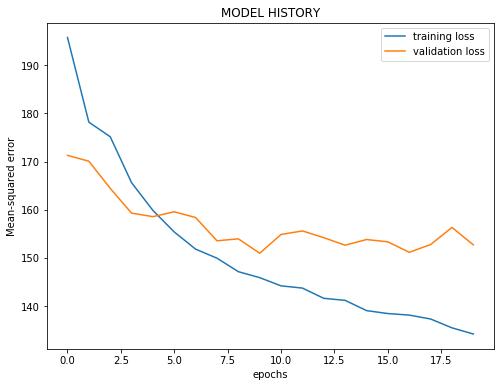

In [159]:
losses = pd.DataFrame(model.history.history)
losses.columns = ['training loss', 'validation loss']
print('Final training loss:\t', np.round(np.sqrt(losses['training loss'].iloc[-1]),2), 'deg\t[RMSE]')
print('Final validation loss:\t', np.round(np.sqrt(losses['validation loss'].iloc[-1]),2), 'deg\t[RMSE]')

losses.plot(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Mean-squared error')
plt.title('MODEL HISTORY')
plt.show()

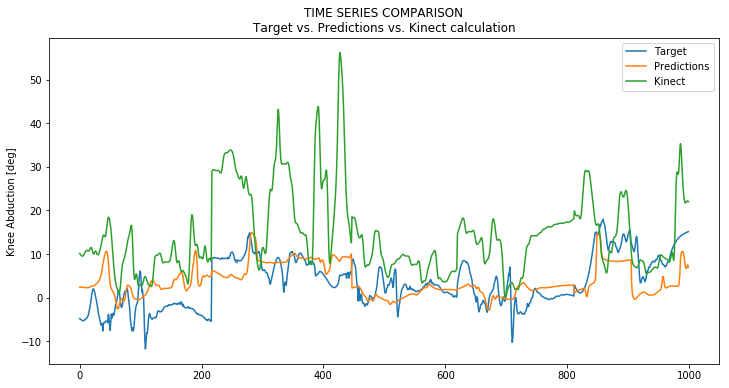

In [160]:
predictions = model.predict(X_val)

sample_size = 1000
start_idx = int(np.random.randint(0, len(y_val)-sample_size, 1))
end_idx = int(start_idx + sample_size)

plt.figure(figsize=(12,6))
plt.plot(y_val[start_idx:end_idx], label='Target')
plt.plot(predictions[start_idx:end_idx], label='Predictions')
plt.plot(y_val_kinect[start_idx:end_idx], label='Kinect')
plt.ylabel('Knee Abduction [deg]')
plt.title('TIME SERIES COMPARISON\nTarget vs. Predictions vs. Kinect calculation')
plt.legend()
plt.show()

In [161]:
y_train_id_list, y_train_id_idx = np.unique(y_train_id, return_index=True)
y_val_id_list, y_val_id_idx = np.unique(y_val_id, return_index=True)

val_target_peak, val_predic_peak, val_kinect_peak = [], [], []

for i in y_val_id_idx[:len(y_val_id_idx)]:
    target_peaki = np.max(y_val[i:i+1])
    predic_peaki = np.max(predictions[i:i+1])
    kinect_peaki = np.max(y_val_kinect[i:i+1])
    val_target_peak.append(target_peaki)    
    val_predic_peak.append(predic_peaki)
    val_kinect_peak.append(kinect_peaki)
val_ICC_predict, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_predic_peak]))
val_ICC_kinect, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_kinect_peak]))

print('MODEL EVALUATION REPORT')
print('\n')
print('Target vs. Model Predictions')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, predictions),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, predictions),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, predictions),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, predictions),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, predictions)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, predictions))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_predict,3))
print('\n')
print('Target vs. Kinect Calculation')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, y_val_kinect),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, y_val_kinect),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, y_val_kinect),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, y_val_kinect),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_kinect,3))

MODEL EVALUATION REPORT


Target vs. Model Predictions
	R2 score:				 10.01 	%
	Explained variance score:		 10.31 	%
	Mean absolute error:			 8.32 	deg
	Mean squared error:			 152.71 deg2
	Root mean squared error:		 12.36 	deg
	Relative root mean squared error:	 13.16 	% [of the target range]


	ICC on peak abduction angles:		 0.216


Target vs. Kinect Calculation
	R2 score:				 -154.76 	%
	Explained variance score:		 -88.71 	%
	Mean absolute error:			 15.15 	deg
	Mean squared error:			 432.33 deg2
	Root mean squared error:		 20.79 	deg
	Relative root mean squared error:	 22.14 	% [of the target range]


	ICC on peak abduction angles:		 -0.081


__
### Conclusion (Model 4)
Slightly more noticeable improvements observed after augmenting the data by mirroring the left leg and combining right and left sides.

___
## MODEL 5 - Mapping from Joint Centers Tracking (Kinect) to Knee Flexion Angle (Vicon) - Active side only.
**A possible source of noise in the data may come from the fact that during SHL trials, we have always considered the movements of boths knees regardless of the leg on which the trial was being performed. In other words, when a participant is performing a SHL test on the right leg, the model will look at the resulting right and left knee angles.**

Considering that the movements of the leg that is up in the air during SLH trials may not be relevant, we will try to only consider the active side and see if it improves the performance of the model.

**First, we need to prescribe NaN to the angles of the non-active leg for each SLH trial.**

In [162]:
mocap_active = mocap
right_list = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z',
                     'V_RHip_fl', 'V_RKnee_fl', 'V_RKnee_ab', 'K_RHip_fl', 'K_RKnee_fl', 'K_RKnee_ab']
left_list = ['K_LHip_x', 'K_LHip_y', 'K_LHip_z', 'K_LKnee_x', 'K_LKnee_y', 'K_LKnee_z', 'K_LAnkle_x', 'K_LAnkle_y', 'K_LAnkle_z',
                    'V_LHip_fl', 'V_LKnee_fl', 'V_LKnee_ab', 'K_LHip_fl', 'K_LKnee_fl', 'K_LKnee_ab']
mocap_active[right_list] = mocap[right_list].mask(mocap['trial_cat']=='LDist')
mocap_active[left_list] = mocap[left_list].mask(mocap['trial_cat']=='RDist')
mocap_active[right_list] = mocap[right_list].mask(mocap['trial_cat']=='LTimed')
mocap_active[left_list] = mocap[left_list].mask(mocap['trial_cat']=='RTimed')

**Then, during the Input/Target data selection, we will simply add a dropna() method to get rid of all non-active leg data.**

__
### Input/Target data selection.

In [163]:
input_columns_R = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z']
input_columns_L = ['K_LHip_x', 'K_LHip_y', 'K_LHip_z', 'K_LKnee_x', 'K_LKnee_y', 'K_LKnee_z', 'K_LAnkle_x', 'K_LAnkle_y', 'K_LAnkle_z']

target_columns_R = ['V_RKnee_fl', 'K_RKnee_fl']
target_columns_L = ['V_LKnee_fl', 'K_LKnee_fl']

X_R = mocap_active[['trial_id'] + input_columns_R]
X_L = mocap_active[['trial_id'] + input_columns_L]
y_R = mocap_active[['trial_id'] + target_columns_R]
y_L = mocap_active[['trial_id'] + target_columns_L]

X_R['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.01)
X_L['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.02)
y_R['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.01)
y_L['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.02)

X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']] = X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']]*-1

X_RL_combined_columns = ['trial_id', 'K_Hip_x', 'K_Hip_y', 'K_Hip_z', 'K_Knee_x', 'K_Knee_y', 'K_Knee_z', 'K_Ankle_x', 'K_Ankle_y', 'K_Ankle_z']
X_R.columns = X_RL_combined_columns
X_L.columns = X_RL_combined_columns

y_RL_combined_columns = ['trial_id', 'V_Knee_fl', 'K_Knee_fl']
y_R.columns = y_RL_combined_columns
y_L.columns = y_RL_combined_columns

X = pd.concat([X_R, X_L])
y = pd.concat([y_R, y_L])

original_length_X = len(X)
original_length_y = len(X)

X = X.dropna()
y = y.dropna()

print('Percentage of dropped data:\t', np.round(100-len(X)*100/original_length_X, 2), ' %')
print('Percentage of dropped data:\t', np.round(100-len(y)*100/original_length_y, 2), ' %')

Percentage of dropped data:	 38.37  %
Percentage of dropped data:	 38.37  %


__
### Train/Validation split:

In [164]:
val_size = 0.2

n_unique_trials = X['trial_id'].nunique()
n_train_trials = int(n_unique_trials*(1-val_size))
n_val_trials = int(n_unique_trials*val_size)

print('Validation size:\t\t', int(val_size*100), '%')
print('Total number of trials:\t\t', X['trial_id'].nunique())
print('Number of training trials:\t', n_train_trials)
print('Number of validation trials:\t', n_val_trials)

id_list = X['trial_id'].unique()

np.random.seed(42)
np.random.shuffle(id_list)

id_list_train = id_list[:n_train_trials]
id_list_val = id_list[n_train_trials:]

X_train = X[X['trial_id'].isin(id_list_train)]
X_val = X[X['trial_id'].isin(id_list_val)]
y_train = y[y['trial_id'].isin(id_list_train)]
y_val = y[y['trial_id'].isin(id_list_val)]

Validation size:		 20 %
Total number of trials:		 439
Number of training trials:	 351
Number of validation trials:	 87


__
### Data segmentation

In [165]:
step_size = 1
segmentation_width = 10

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

# Initialization
X_train_trials_list = []
y_train_trials_list = []
y_train_trials_id_list = []
X_val_trials_list = []
y_val_trials_list = []
y_val_trials_id_list = []

# Isolate each unique trial data as a numpy array and append it to the trials list
for i in np.unique(X_train[:,0]): 
    Xi = X_train[X_train[:,0] == i, 1:]
    X_train_trials_list.append(Xi)
    yi = y_train[y_train[:,0] == i, 1:]
    y_train_trials_list.append(yi)
    idi = y_train[y_train[:,0] == i, 0]
    y_train_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

for i in np.unique(X_val[:,0]): 
    Xi = X_val[X_val[:,0] == i, 1:]
    X_val_trials_list.append(Xi)
    yi = y_val[y_val[:,0] == i, 1:]
    y_val_trials_list.append(yi)
    idi = y_val[y_val[:,0] == i, 0]
    y_val_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)
        
train_trials_length = [len(x) for x in X_train_trials_list]
val_trials_length = [len(x) for x in X_val_trials_list]

X_train_trials_array = np.array(X_train_trials_list)
y_train_trials_array = np.array(y_train_trials_list)
y_train_trials_id_array = np.array(y_train_trials_id_list)
X_val_trials_array = np.array(X_val_trials_list)
y_val_trials_array = np.array(y_val_trials_list)
y_val_trials_id_array = np.array(y_val_trials_id_list)

y_train_trials_array_target = np.array([y_train_trials_array[:][x][:,0] for x in range(len(y_train_trials_array))])
y_train_trials_array_kinect = np.array([y_train_trials_array[:][x][:,1] for x in range(len(y_train_trials_array))])
y_val_trials_array_target = np.array([y_val_trials_array[:][x][:,0] for x in range(len(y_val_trials_array))])
y_val_trials_array_kinect = np.array([y_val_trials_array[:][x][:,1] for x in range(len(y_val_trials_array))])

seg = SegmentXY(step=step_size, width=segmentation_width, order='C', y_func=last)

X_train, y_train, _ = seg.transform(X_train_trials_array, y_train_trials_array_target)
_, y_train_kinect, _ = seg.transform(X_train_trials_array, y_train_trials_array_kinect)
_, y_train_id, _ = seg.transform(X_train_trials_array, y_train_trials_id_array)
X_val, y_val, _ = seg.transform(X_val_trials_array, y_val_trials_array_target)
_, y_val_kinect, _ = seg.transform(X_val_trials_array, y_val_trials_array_kinect)
_, y_val_id, _ = seg.transform(X_val_trials_array, y_val_trials_id_array)

print('TRAINING DATA')
print('Number of segments:\t\t', X_train.shape[0])
print('Percentage of the dataset:\t', np.round(X_train.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_train.shape[1])
print('Number of input channels:\t', X_train.shape[2])
print('\n')
print('VALIDATION DATA')
print('Number of segments:\t\t', X_val.shape[0])
print('Percentage of the dataset:\t', np.round(X_val.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_val.shape[1])
print('Number of input channels:\t', X_val.shape[2])

TRAINING DATA
Number of segments:		 50299
Percentage of the dataset:	 79.61 %
Segments width:			 10
Number of input channels:	 9


VALIDATION DATA
Number of segments:		 12880
Percentage of the dataset:	 20.39 %
Segments width:			 10
Number of input channels:	 9


__
### Model training

In [166]:
early_stop = EarlyStopping(monitor='val_loss', patience=20)

learning_rate = 0.001
opt = Adam(lr=learning_rate)

# Define model
model = Sequential()
model.add(Bidirectional(LSTM(20), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
# Compile model
model.compile(optimizer=opt, loss='mse')

model.fit(X_train, y_train, 
          batch_size=1024,
          epochs=5000,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Train on 50299 samples, validate on 12880 samples
Epoch 1/5000
50299/50299 [==============================] - 10s 196us/sample - loss: 2512.7738 - val_loss: 2423.8507
Epoch 2/5000
50299/50299 [==============================] - 7s 140us/sample - loss: 2079.1623 - val_loss: 1846.9881
Epoch 3/5000
50299/50299 [==============================] - 6s 126us/sample - loss: 1653.1756 - val_loss: 1589.7011
Epoch 4/5000
50299/50299 [==============================] - 6s 126us/sample - loss: 1471.8526 - val_loss: 1438.9962
Epoch 5/5000
50299/50299 [==============================] - 7s 133us/sample - loss: 1342.0803 - val_loss: 1315.9225
Epoch 6/5000
50299/50299 [==============================] - 6s 127us/sample - loss: 1233.8295 - val_loss: 1210.7915
Epoch 7/5000
50299/50299 [==============================] - 6s 126us/sample - loss: 1140.9053 - val_loss: 1119.7363
Epoch 8/5000
50299/50299 [==============================] - 6s 125us/sample - loss: 1060.5400 - val_loss: 1040.2505
Epoch 9/5000
50299/50

50299/50299 [==============================] - 6s 125us/sample - loss: 241.1445 - val_loss: 219.2387
Epoch 72/5000
50299/50299 [==============================] - 6s 125us/sample - loss: 231.3148 - val_loss: 207.8560
Epoch 73/5000
50299/50299 [==============================] - 6s 128us/sample - loss: 223.2914 - val_loss: 202.5178
Epoch 74/5000
50299/50299 [==============================] - 6s 125us/sample - loss: 214.9732 - val_loss: 194.4089
Epoch 75/5000
50299/50299 [==============================] - 6s 126us/sample - loss: 208.2928 - val_loss: 195.3958
Epoch 76/5000
50299/50299 [==============================] - 7s 133us/sample - loss: 202.3150 - val_loss: 185.0716
Epoch 77/5000
50299/50299 [==============================] - 7s 136us/sample - loss: 198.0161 - val_loss: 181.2632
Epoch 78/5000
50299/50299 [==============================] - 11s 217us/sample - loss: 193.2460 - val_loss: 181.4415
Epoch 79/5000
50299/50299 [==============================] - 8s 155us/sample - loss: 189.9122

Epoch 142/5000
50299/50299 [==============================] - 7s 130us/sample - loss: 119.8818 - val_loss: 129.6516
Epoch 143/5000
50299/50299 [==============================] - 7s 131us/sample - loss: 118.9666 - val_loss: 130.9618
Epoch 144/5000
50299/50299 [==============================] - 7s 141us/sample - loss: 119.7614 - val_loss: 127.7141
Epoch 145/5000
50299/50299 [==============================] - 7s 131us/sample - loss: 119.6759 - val_loss: 131.4853
Epoch 146/5000
50299/50299 [==============================] - 7s 133us/sample - loss: 118.9254 - val_loss: 129.6085
Epoch 147/5000
50299/50299 [==============================] - 7s 135us/sample - loss: 118.2916 - val_loss: 127.0861
Epoch 148/5000
50299/50299 [==============================] - 7s 141us/sample - loss: 118.4365 - val_loss: 127.4283
Epoch 149/5000
50299/50299 [==============================] - 8s 166us/sample - loss: 118.9651 - val_loss: 130.8898
Epoch 150/5000
50299/50299 [==============================] - 9s 183us/s

**Save the model.**

In [167]:
model.save('Knee_fl_active.h5')

__
### Model evaluation

Final training loss:	 10.6 deg	[RMSE]
Final validation loss:	 11.23 deg	[RMSE]


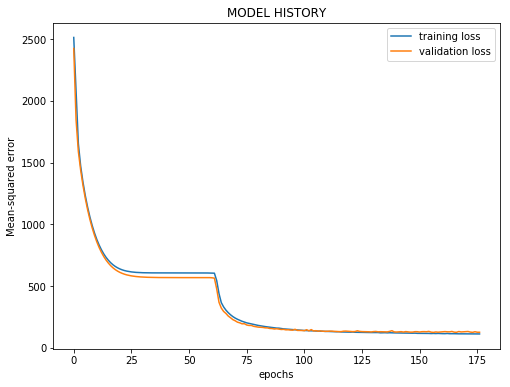

In [168]:
losses = pd.DataFrame(model.history.history)
losses.columns = ['training loss', 'validation loss']
print('Final training loss:\t', np.round(np.sqrt(losses['training loss'].iloc[-1]),2), 'deg\t[RMSE]')
print('Final validation loss:\t', np.round(np.sqrt(losses['validation loss'].iloc[-1]),2), 'deg\t[RMSE]')

losses.plot(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Mean-squared error')
plt.title('MODEL HISTORY')
plt.show()

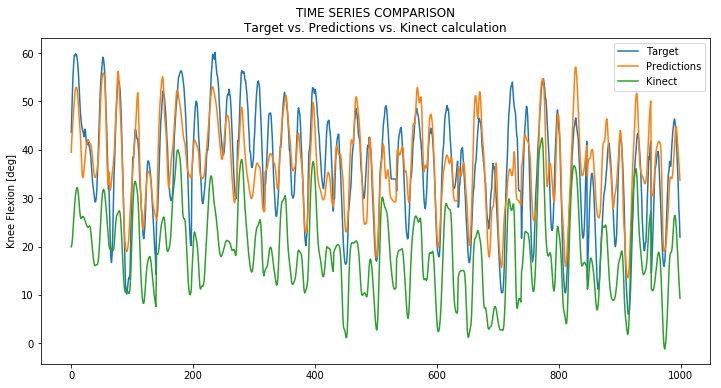

In [169]:
predictions = model.predict(X_val)

sample_size = 1000
start_idx = int(np.random.randint(0, len(y_val)-sample_size, 1))
end_idx = int(start_idx + sample_size)

plt.figure(figsize=(12,6))
plt.plot(y_val[start_idx:end_idx], label='Target')
plt.plot(predictions[start_idx:end_idx], label='Predictions')
plt.plot(y_val_kinect[start_idx:end_idx], label='Kinect')
plt.ylabel('Knee Flexion [deg]')
plt.title('TIME SERIES COMPARISON\nTarget vs. Predictions vs. Kinect calculation')
plt.legend()
plt.show()

In [170]:
y_train_id_list, y_train_id_idx = np.unique(y_train_id, return_index=True)
y_val_id_list, y_val_id_idx = np.unique(y_val_id, return_index=True)

val_target_peak, val_predic_peak, val_kinect_peak = [], [], []

for i in y_val_id_idx[:len(y_val_id_idx)]:
    target_peaki = np.max(y_val[i:i+1])
    predic_peaki = np.max(predictions[i:i+1])
    kinect_peaki = np.max(y_val_kinect[i:i+1])
    val_target_peak.append(target_peaki)    
    val_predic_peak.append(predic_peaki)
    val_kinect_peak.append(kinect_peaki)
val_ICC_predict, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_predic_peak]))
val_ICC_kinect, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_kinect_peak]))

print('MODEL EVALUATION REPORT')
print('\n')
print('Target vs. Model Predictions')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, predictions),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, predictions),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, predictions),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, predictions),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, predictions)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, predictions))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak flexion angles:\t\t', np.round(val_ICC_predict,3))
print('\n')
print('Target vs. Kinect Calculation')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, y_val_kinect),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, y_val_kinect),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, y_val_kinect),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, y_val_kinect),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak flexion angles:\t\t', np.round(val_ICC_kinect,3))

MODEL EVALUATION REPORT


Target vs. Model Predictions
	R2 score:				 77.73 	%
	Explained variance score:		 77.76 	%
	Mean absolute error:			 7.89 	deg
	Mean squared error:			 126.15 deg2
	Root mean squared error:		 11.23 	deg
	Relative root mean squared error:	 9.16 	% [of the target range]


	ICC on peak flexion angles:		 0.8


Target vs. Kinect Calculation
	R2 score:				 39.88 	%
	Explained variance score:		 62.09 	%
	Mean absolute error:			 14.57 	deg
	Mean squared error:			 340.54 deg2
	Root mean squared error:		 18.45 	deg
	Relative root mean squared error:	 15.05 	% [of the target range]


	ICC on peak flexion angles:		 0.799


__
### Conclusion (Model 5)
The performance of the model was slightly increased by only considering the active leg data.

___
## MODEL 6 - Mapping from Joint Centers Tracking (Kinect) to Knee Abduction Angle (Vicon) - Active side only.

__
### Input/Target data selection.

In [171]:
mocap_active = mocap
right_list = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z',
                     'V_RHip_fl', 'V_RKnee_fl', 'V_RKnee_ab', 'K_RHip_fl', 'K_RKnee_fl', 'K_RKnee_ab']
left_list = ['K_LHip_x', 'K_LHip_y', 'K_LHip_z', 'K_LKnee_x', 'K_LKnee_y', 'K_LKnee_z', 'K_LAnkle_x', 'K_LAnkle_y', 'K_LAnkle_z',
                    'V_LHip_fl', 'V_LKnee_fl', 'V_LKnee_ab', 'K_LHip_fl', 'K_LKnee_fl', 'K_LKnee_ab']
mocap_active[right_list] = mocap[right_list].mask(mocap['trial_cat']=='LDist')
mocap_active[left_list] = mocap[left_list].mask(mocap['trial_cat']=='RDist')
mocap_active[right_list] = mocap[right_list].mask(mocap['trial_cat']=='LTimed')
mocap_active[left_list] = mocap[left_list].mask(mocap['trial_cat']=='RTimed')

input_columns_R = ['K_RHip_x', 'K_RHip_y', 'K_RHip_z', 'K_RKnee_x', 'K_RKnee_y', 'K_RKnee_z', 'K_RAnkle_x', 'K_RAnkle_y', 'K_RAnkle_z']
input_columns_L = ['K_LHip_x', 'K_LHip_y', 'K_LHip_z', 'K_LKnee_x', 'K_LKnee_y', 'K_LKnee_z', 'K_LAnkle_x', 'K_LAnkle_y', 'K_LAnkle_z']

target_columns_R = ['V_RKnee_ab', 'K_RKnee_ab']
target_columns_L = ['V_LKnee_ab', 'K_LKnee_ab']

X_R = mocap_active[['trial_id'] + input_columns_R]
X_L = mocap_active[['trial_id'] + input_columns_L]
y_R = mocap_active[['trial_id'] + target_columns_R]
y_L = mocap_active[['trial_id'] + target_columns_L]

X_R['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.01)
X_L['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.02)
y_R['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.01)
y_L['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.02)

X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']] = X_L[['K_LHip_y', 'K_LKnee_y', 'K_LAnkle_y']]*-1

X_RL_combined_columns = ['trial_id', 'K_Hip_x', 'K_Hip_y', 'K_Hip_z', 'K_Knee_x', 'K_Knee_y', 'K_Knee_z', 'K_Ankle_x', 'K_Ankle_y', 'K_Ankle_z']
X_R.columns = X_RL_combined_columns
X_L.columns = X_RL_combined_columns

y_RL_combined_columns = ['trial_id', 'V_Knee_ab', 'K_Knee_ab']
y_R.columns = y_RL_combined_columns
y_L.columns = y_RL_combined_columns

X = pd.concat([X_R, X_L])
y = pd.concat([y_R, y_L])

original_length_X = len(X)
original_length_y = len(X)

X = X.dropna()
y = y.dropna()

print('Percentage of dropped data:\t', np.round(100-len(X)*100/original_length_X, 2), ' %')
print('Percentage of dropped data:\t', np.round(100-len(y)*100/original_length_y, 2), ' %')

Percentage of dropped data:	 38.37  %
Percentage of dropped data:	 38.37  %


__
### Train/Validation split

In [172]:
val_size = 0.2

n_unique_trials = X['trial_id'].nunique()
n_train_trials = int(n_unique_trials*(1-val_size))
n_val_trials = int(n_unique_trials*val_size)

print('Validation size:\t\t', int(val_size*100), '%')
print('Total number of trials:\t\t', X['trial_id'].nunique())
print('Number of training trials:\t', n_train_trials)
print('Number of validation trials:\t', n_val_trials)

id_list = X['trial_id'].unique()

np.random.seed(42)
np.random.shuffle(id_list)

id_list_train = id_list[:n_train_trials]
id_list_val = id_list[n_train_trials:]

X_train = X[X['trial_id'].isin(id_list_train)]
X_val = X[X['trial_id'].isin(id_list_val)]
y_train = y[y['trial_id'].isin(id_list_train)]
y_val = y[y['trial_id'].isin(id_list_val)]

Validation size:		 20 %
Total number of trials:		 439
Number of training trials:	 351
Number of validation trials:	 87


__
### Data segmentation

In [173]:
step_size = 1
segmentation_width = 10

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

# Initialization
X_train_trials_list = []
y_train_trials_list = []
y_train_trials_id_list = []
X_val_trials_list = []
y_val_trials_list = []
y_val_trials_id_list = []

# Isolate each unique trial data as a numpy array and append it to the trials list
for i in np.unique(X_train[:,0]): 
    Xi = X_train[X_train[:,0] == i, 1:]
    X_train_trials_list.append(Xi)
    yi = y_train[y_train[:,0] == i, 1:]
    y_train_trials_list.append(yi)
    idi = y_train[y_train[:,0] == i, 0]
    y_train_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

for i in np.unique(X_val[:,0]): 
    Xi = X_val[X_val[:,0] == i, 1:]
    X_val_trials_list.append(Xi)
    yi = y_val[y_val[:,0] == i, 1:]
    y_val_trials_list.append(yi)
    idi = y_val[y_val[:,0] == i, 0]
    y_val_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)
        
train_trials_length = [len(x) for x in X_train_trials_list]
val_trials_length = [len(x) for x in X_val_trials_list]

X_train_trials_array = np.array(X_train_trials_list)
y_train_trials_array = np.array(y_train_trials_list)
y_train_trials_id_array = np.array(y_train_trials_id_list)
X_val_trials_array = np.array(X_val_trials_list)
y_val_trials_array = np.array(y_val_trials_list)
y_val_trials_id_array = np.array(y_val_trials_id_list)

y_train_trials_array_target = np.array([y_train_trials_array[:][x][:,0] for x in range(len(y_train_trials_array))])
y_train_trials_array_kinect = np.array([y_train_trials_array[:][x][:,1] for x in range(len(y_train_trials_array))])
y_val_trials_array_target = np.array([y_val_trials_array[:][x][:,0] for x in range(len(y_val_trials_array))])
y_val_trials_array_kinect = np.array([y_val_trials_array[:][x][:,1] for x in range(len(y_val_trials_array))])

seg = SegmentXY(step=step_size, width=segmentation_width, order='C', y_func=last)

X_train, y_train, _ = seg.transform(X_train_trials_array, y_train_trials_array_target)
_, y_train_kinect, _ = seg.transform(X_train_trials_array, y_train_trials_array_kinect)
_, y_train_id, _ = seg.transform(X_train_trials_array, y_train_trials_id_array)
X_val, y_val, _ = seg.transform(X_val_trials_array, y_val_trials_array_target)
_, y_val_kinect, _ = seg.transform(X_val_trials_array, y_val_trials_array_kinect)
_, y_val_id, _ = seg.transform(X_val_trials_array, y_val_trials_id_array)

print('TRAINING DATA')
print('Number of segments:\t\t', X_train.shape[0])
print('Percentage of the dataset:\t', np.round(X_train.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_train.shape[1])
print('Number of input channels:\t', X_train.shape[2])
print('\n')
print('VALIDATION DATA')
print('Number of segments:\t\t', X_val.shape[0])
print('Percentage of the dataset:\t', np.round(X_val.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_val.shape[1])
print('Number of input channels:\t', X_val.shape[2])

TRAINING DATA
Number of segments:		 50299
Percentage of the dataset:	 79.61 %
Segments width:			 10
Number of input channels:	 9


VALIDATION DATA
Number of segments:		 12880
Percentage of the dataset:	 20.39 %
Segments width:			 10
Number of input channels:	 9


__
### Model training

In [174]:
early_stop = EarlyStopping(monitor='val_loss', patience=20)

learning_rate = 0.001
opt = Adam(lr=learning_rate)

# Define model
model = Sequential()
model.add(Bidirectional(LSTM(20), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
# Compile model
model.compile(optimizer=opt, loss='mse')

model.fit(X_train, y_train, 
          batch_size=1024,
          epochs=5000,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Train on 50299 samples, validate on 12880 samples
Epoch 1/5000
50299/50299 [==============================] - 12s 230us/sample - loss: 123.7844 - val_loss: 154.0402
Epoch 2/5000
50299/50299 [==============================] - 7s 140us/sample - loss: 117.9178 - val_loss: 150.6238
Epoch 3/5000
50299/50299 [==============================] - 7s 145us/sample - loss: 116.3762 - val_loss: 146.7596
Epoch 4/5000
50299/50299 [==============================] - 10s 190us/sample - loss: 111.3135 - val_loss: 143.8436
Epoch 5/5000
50299/50299 [==============================] - 9s 173us/sample - loss: 104.5395 - val_loss: 142.8419
Epoch 6/5000
50299/50299 [==============================] - 7s 146us/sample - loss: 98.6742 - val_loss: 142.4655
Epoch 7/5000
50299/50299 [==============================] - 7s 142us/sample - loss: 94.7821 - val_loss: 140.9811
Epoch 8/5000
50299/50299 [==============================] - 8s 158us/sample - loss: 91.8471 - val_loss: 139.7863
Epoch 9/5000
50299/50299 [=============

**Save the model.**

In [175]:
model.save('Knee_ab_active.h5')

__
### Model evaluation

Final training loss:	 7.83 deg	[RMSE]
Final validation loss:	 11.77 deg	[RMSE]


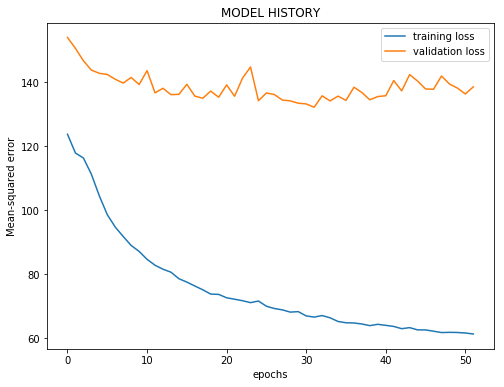

In [176]:
losses = pd.DataFrame(model.history.history)
losses.columns = ['training loss', 'validation loss']
print('Final training loss:\t', np.round(np.sqrt(losses['training loss'].iloc[-1]),2), 'deg\t[RMSE]')
print('Final validation loss:\t', np.round(np.sqrt(losses['validation loss'].iloc[-1]),2), 'deg\t[RMSE]')

losses.plot(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Mean-squared error')
plt.title('MODEL HISTORY')
plt.show()

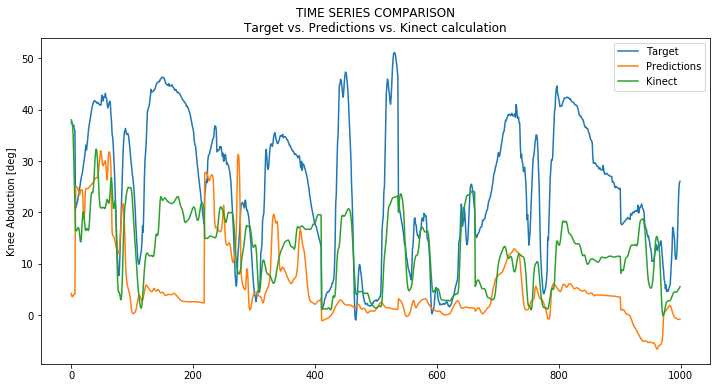

In [177]:
predictions = model.predict(X_val)

sample_size = 1000
start_idx = int(np.random.randint(0, len(y_val)-sample_size, 1))
end_idx = int(start_idx + sample_size)

plt.figure(figsize=(12,6))
plt.plot(y_val[start_idx:end_idx], label='Target')
plt.plot(predictions[start_idx:end_idx], label='Predictions')
plt.plot(y_val_kinect[start_idx:end_idx], label='Kinect')
plt.ylabel('Knee Abduction [deg]')
plt.title('TIME SERIES COMPARISON\nTarget vs. Predictions vs. Kinect calculation')
plt.legend()
plt.show()

In [178]:
y_train_id_list, y_train_id_idx = np.unique(y_train_id, return_index=True)
y_val_id_list, y_val_id_idx = np.unique(y_val_id, return_index=True)

val_target_peak, val_predic_peak, val_kinect_peak = [], [], []

for i in y_val_id_idx[:len(y_val_id_idx)]:
    target_peaki = np.max(y_val[i:i+1])
    predic_peaki = np.max(predictions[i:i+1])
    kinect_peaki = np.max(y_val_kinect[i:i+1])
    val_target_peak.append(target_peaki)    
    val_predic_peak.append(predic_peaki)
    val_kinect_peak.append(kinect_peaki)
val_ICC_predict, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_predic_peak]))
val_ICC_kinect, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_kinect_peak]))

print('MODEL EVALUATION REPORT')
print('\n')
print('Target vs. Model Predictions')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, predictions),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, predictions),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, predictions),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, predictions),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, predictions)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, predictions))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_predict,3))
print('\n')
print('Target vs. Kinect Calculation')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, y_val_kinect),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, y_val_kinect),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, y_val_kinect),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, y_val_kinect),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_kinect,3))

MODEL EVALUATION REPORT


Target vs. Model Predictions
	R2 score:				 6.61 	%
	Explained variance score:		 6.93 	%
	Mean absolute error:			 8.11 	deg
	Mean squared error:			 138.6 deg2
	Root mean squared error:		 11.77 	deg
	Relative root mean squared error:	 12.83 	% [of the target range]


	ICC on peak abduction angles:		 0.443


Target vs. Kinect Calculation
	R2 score:				 -39.01 	%
	Explained variance score:		 -1.88 	%
	Mean absolute error:			 12.03 	deg
	Mean squared error:			 206.31 deg2
	Root mean squared error:		 14.36 	deg
	Relative root mean squared error:	 15.66 	% [of the target range]


	ICC on peak abduction angles:		 0.255


__
### Conclusion (Model 6)
While slight improvements were observed by only considering the active leg data, the model was still not able to fully learn the mapping from Kinect Joint Centers Tracking to Vicon Joint Angles.

___
## MODEL 7 - Mapping from Joint Centers Tracking (Vicon) to Knee Abduction Angle (Vicon) - Active side only.
**In order to understand why no model was able to learn the mapping from Kinect Joint Centers Tracking to Vicon Knee Abduction Angle, we will try to train a new model using Vicon Joint Centers Tracking data as input.**

The rational behind this model is that Kinect Tracking data may be more noisy than Vicon Tracking data, which may be one of the contributing factor as to why all models are failing at learning the mapping to Knee Abduction Angle.

__
### Input/Target data selection.

In [179]:
mocap_active = mocap
right_list = ['V_RHip_x', 'V_RHip_y', 'V_RHip_z', 'V_RKnee_x', 'V_RKnee_y', 'V_RKnee_z', 'V_RAnkle_x', 'V_RAnkle_y', 'V_RAnkle_z',
                     'V_RHip_fl', 'V_RKnee_fl', 'V_RKnee_ab', 'K_RHip_fl', 'K_RKnee_fl', 'K_RKnee_ab']
left_list = ['V_LHip_x', 'V_LHip_y', 'V_LHip_z', 'V_LKnee_x', 'V_LKnee_y', 'V_LKnee_z', 'V_LAnkle_x', 'V_LAnkle_y', 'V_LAnkle_z',
                    'V_LHip_fl', 'V_LKnee_fl', 'V_LKnee_ab', 'K_LHip_fl', 'K_LKnee_fl', 'K_LKnee_ab']
mocap_active[right_list] = mocap[right_list].mask(mocap['trial_cat']=='LDist')
mocap_active[left_list] = mocap[left_list].mask(mocap['trial_cat']=='RDist')
mocap_active[right_list] = mocap[right_list].mask(mocap['trial_cat']=='LTimed')
mocap_active[left_list] = mocap[left_list].mask(mocap['trial_cat']=='RTimed')

input_columns_R = ['V_RHip_x', 'V_RHip_y', 'V_RHip_z', 'V_RKnee_x', 'V_RKnee_y', 'V_RKnee_z', 'V_RAnkle_x', 'V_RAnkle_y', 'V_RAnkle_z']
input_columns_L = ['V_LHip_x', 'V_LHip_y', 'V_LHip_z', 'V_LKnee_x', 'V_LKnee_y', 'V_LKnee_z', 'V_LAnkle_x', 'V_LAnkle_y', 'V_LAnkle_z']

target_columns_R = ['V_RKnee_ab', 'V_RKnee_ab']
target_columns_L = ['V_LKnee_ab', 'V_LKnee_ab']

X_R = mocap_active[['trial_id'] + input_columns_R]
X_L = mocap_active[['trial_id'] + input_columns_L]
y_R = mocap_active[['trial_id'] + target_columns_R]
y_L = mocap_active[['trial_id'] + target_columns_L]

X_R['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.01)
X_L['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.02)
y_R['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.01)
y_L['trial_id'] = mocap_active['trial_id'].apply(lambda id: id+.02)

X_L[['V_LHip_y', 'V_LKnee_y', 'V_LAnkle_y']] = X_L[['V_LHip_y', 'V_LKnee_y', 'V_LAnkle_y']]*-1

X_RL_combined_columns = ['trial_id', 'V_Hip_x', 'V_Hip_y', 'V_Hip_z', 'V_Knee_x', 'V_Knee_y', 'V_Knee_z', 'V_Ankle_x', 'V_Ankle_y', 'V_Ankle_z']
X_R.columns = X_RL_combined_columns
X_L.columns = X_RL_combined_columns

y_RL_combined_columns = ['trial_id', 'V_Knee_ab', 'V_Knee_ab']
y_R.columns = y_RL_combined_columns
y_L.columns = y_RL_combined_columns

X = pd.concat([X_R, X_L])
y = pd.concat([y_R, y_L])

original_length_X = len(X)
original_length_y = len(X)

X = X.dropna()
y = y.dropna()

print('Percentage of dropped data:\t', np.round(100-len(X)*100/original_length_X, 2), ' %')
print('Percentage of dropped data:\t', np.round(100-len(y)*100/original_length_y, 2), ' %')

Percentage of dropped data:	 38.37  %
Percentage of dropped data:	 38.37  %


__
### Train/Validation split

In [180]:
val_size = 0.2

n_unique_trials = X['trial_id'].nunique()
n_train_trials = int(n_unique_trials*(1-val_size))
n_val_trials = int(n_unique_trials*val_size)

print('Validation size:\t\t', int(val_size*100), '%')
print('Total number of trials:\t\t', X['trial_id'].nunique())
print('Number of training trials:\t', n_train_trials)
print('Number of validation trials:\t', n_val_trials)

id_list = X['trial_id'].unique()

np.random.seed(42)
np.random.shuffle(id_list)

id_list_train = id_list[:n_train_trials]
id_list_val = id_list[n_train_trials:]

X_train = X[X['trial_id'].isin(id_list_train)]
X_val = X[X['trial_id'].isin(id_list_val)]
y_train = y[y['trial_id'].isin(id_list_train)]
y_val = y[y['trial_id'].isin(id_list_val)]

Validation size:		 20 %
Total number of trials:		 439
Number of training trials:	 351
Number of validation trials:	 87


__
### Data segmentation

In [181]:
step_size = 1
segmentation_width = 10

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

# Initialization
X_train_trials_list = []
y_train_trials_list = []
y_train_trials_id_list = []
X_val_trials_list = []
y_val_trials_list = []
y_val_trials_id_list = []

# Isolate each unique trial data as a numpy array and append it to the trials list
for i in np.unique(X_train[:,0]): 
    Xi = X_train[X_train[:,0] == i, 1:]
    X_train_trials_list.append(Xi)
    yi = y_train[y_train[:,0] == i, 1:]
    y_train_trials_list.append(yi)
    idi = y_train[y_train[:,0] == i, 0]
    y_train_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)

for i in np.unique(X_val[:,0]): 
    Xi = X_val[X_val[:,0] == i, 1:]
    X_val_trials_list.append(Xi)
    yi = y_val[y_val[:,0] == i, 1:]
    y_val_trials_list.append(yi)
    idi = y_val[y_val[:,0] == i, 0]
    y_val_trials_id_list.append(idi)
    if len(Xi) != len(yi):
        raise ValueError("Different lengths between X ", len(Xi), " and y ", len(yi), " for trial ID: ", i)
        
train_trials_length = [len(x) for x in X_train_trials_list]
val_trials_length = [len(x) for x in X_val_trials_list]

X_train_trials_array = np.array(X_train_trials_list)
y_train_trials_array = np.array(y_train_trials_list)
y_train_trials_id_array = np.array(y_train_trials_id_list)
X_val_trials_array = np.array(X_val_trials_list)
y_val_trials_array = np.array(y_val_trials_list)
y_val_trials_id_array = np.array(y_val_trials_id_list)

y_train_trials_array_target = np.array([y_train_trials_array[:][x][:,0] for x in range(len(y_train_trials_array))])
y_train_trials_array_kinect = np.array([y_train_trials_array[:][x][:,1] for x in range(len(y_train_trials_array))])
y_val_trials_array_target = np.array([y_val_trials_array[:][x][:,0] for x in range(len(y_val_trials_array))])
y_val_trials_array_kinect = np.array([y_val_trials_array[:][x][:,1] for x in range(len(y_val_trials_array))])

seg = SegmentXY(step=step_size, width=segmentation_width, order='C', y_func=last)

X_train, y_train, _ = seg.transform(X_train_trials_array, y_train_trials_array_target)
_, y_train_kinect, _ = seg.transform(X_train_trials_array, y_train_trials_array_kinect)
_, y_train_id, _ = seg.transform(X_train_trials_array, y_train_trials_id_array)
X_val, y_val, _ = seg.transform(X_val_trials_array, y_val_trials_array_target)
_, y_val_kinect, _ = seg.transform(X_val_trials_array, y_val_trials_array_kinect)
_, y_val_id, _ = seg.transform(X_val_trials_array, y_val_trials_id_array)

print('TRAINING DATA')
print('Number of segments:\t\t', X_train.shape[0])
print('Percentage of the dataset:\t', np.round(X_train.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_train.shape[1])
print('Number of input channels:\t', X_train.shape[2])
print('\n')
print('VALIDATION DATA')
print('Number of segments:\t\t', X_val.shape[0])
print('Percentage of the dataset:\t', np.round(X_val.shape[0]*100/(X_train.shape[0]+X_val.shape[0]),2), '%')
print('Segments width:\t\t\t', X_val.shape[1])
print('Number of input channels:\t', X_val.shape[2])

TRAINING DATA
Number of segments:		 50299
Percentage of the dataset:	 79.61 %
Segments width:			 10
Number of input channels:	 9


VALIDATION DATA
Number of segments:		 12880
Percentage of the dataset:	 20.39 %
Segments width:			 10
Number of input channels:	 9


__
### Model training

In [182]:
early_stop = EarlyStopping(monitor='val_loss', patience=20)

learning_rate = 0.001
opt = Adam(lr=learning_rate)

# Define model
model = Sequential()
model.add(Bidirectional(LSTM(20), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
# Compile model
model.compile(optimizer=opt, loss='mse')

model.fit(X_train, y_train, 
          batch_size=1024,
          epochs=5000,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Train on 50299 samples, validate on 12880 samples
Epoch 1/5000
50299/50299 [==============================] - 12s 235us/sample - loss: 122.4208 - val_loss: 151.4447
Epoch 2/5000
50299/50299 [==============================] - 7s 143us/sample - loss: 117.6299 - val_loss: 149.9347
Epoch 3/5000
50299/50299 [==============================] - 7s 147us/sample - loss: 115.2762 - val_loss: 145.8339
Epoch 4/5000
50299/50299 [==============================] - 7s 147us/sample - loss: 111.2331 - val_loss: 144.0619
Epoch 5/5000
50299/50299 [==============================] - 8s 154us/sample - loss: 108.0628 - val_loss: 145.1333
Epoch 6/5000
50299/50299 [==============================] - 8s 150us/sample - loss: 105.4368 - val_loss: 145.0820
Epoch 7/5000
50299/50299 [==============================] - 8s 152us/sample - loss: 103.6485 - val_loss: 144.2776
Epoch 8/5000
50299/50299 [==============================] - 8s 154us/sample - loss: 101.8856 - val_loss: 143.3367
Epoch 9/5000
50299/50299 [===========

**Save the model.**

In [183]:
model.save('Knee_ab_active_vicon.h5')

__
### Model evaluation

Final training loss:	 8.81 deg	[RMSE]
Final validation loss:	 12.4 deg	[RMSE]


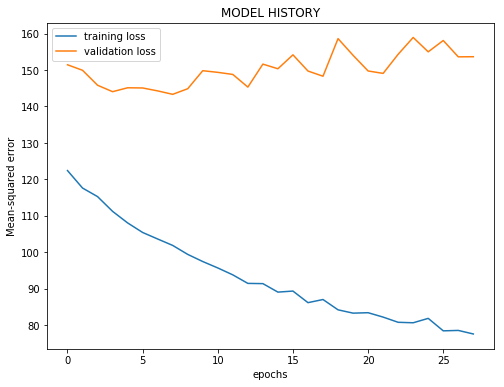

In [184]:
losses = pd.DataFrame(model.history.history)
losses.columns = ['training loss', 'validation loss']
print('Final training loss:\t', np.round(np.sqrt(losses['training loss'].iloc[-1]),2), 'deg\t[RMSE]')
print('Final validation loss:\t', np.round(np.sqrt(losses['validation loss'].iloc[-1]),2), 'deg\t[RMSE]')

losses.plot(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Mean-squared error')
plt.title('MODEL HISTORY')
plt.show()

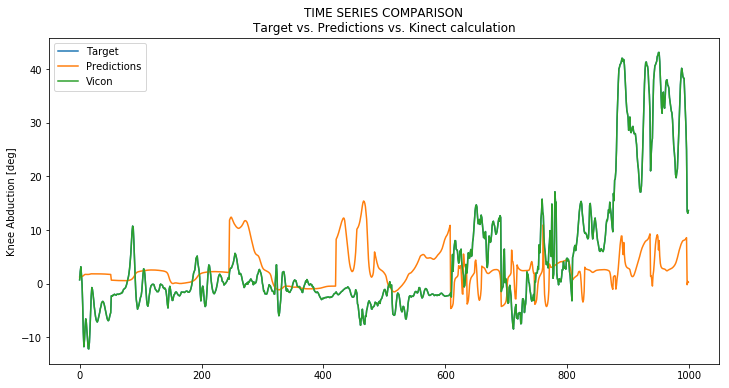

In [185]:
predictions = model.predict(X_val)

sample_size = 1000
start_idx = int(np.random.randint(0, len(y_val)-sample_size, 1))
end_idx = int(start_idx + sample_size)

plt.figure(figsize=(12,6))
plt.plot(y_val[start_idx:end_idx], label='Target')
plt.plot(predictions[start_idx:end_idx], label='Predictions')
plt.plot(y_val_kinect[start_idx:end_idx], label='Vicon')
plt.ylabel('Knee Abduction [deg]')
plt.title('TIME SERIES COMPARISON\nTarget vs. Predictions vs. Kinect calculation')
plt.legend()
plt.show()

In [186]:
y_train_id_list, y_train_id_idx = np.unique(y_train_id, return_index=True)
y_val_id_list, y_val_id_idx = np.unique(y_val_id, return_index=True)

val_target_peak, val_predic_peak, val_kinect_peak = [], [], []

for i in y_val_id_idx[:len(y_val_id_idx)]:
    target_peaki = np.max(y_val[i:i+1])
    predic_peaki = np.max(predictions[i:i+1])
    kinect_peaki = np.max(y_val_kinect[i:i+1])
    val_target_peak.append(target_peaki)    
    val_predic_peak.append(predic_peaki)
    val_kinect_peak.append(kinect_peaki)
val_ICC_predict, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_predic_peak]))
val_ICC_kinect, _, _, _, _, _ = ICC_2way_mixed(np.transpose([val_target_peak, val_kinect_peak]))

print('MODEL EVALUATION REPORT')
print('\n')
print('Target vs. Model Predictions')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, predictions),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, predictions),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, predictions),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, predictions),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, predictions)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, predictions))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_predict,3))
print('\n')
print('Target vs. Vicon Calculation')
print('\tR2 score:\t\t\t\t', np.round(100*r2_score(y_val, y_val_kinect),2), '\t%')
print('\tExplained variance score:\t\t', np.round(100*explained_variance_score(y_val, y_val_kinect),2), '\t%')
print('\tMean absolute error:\t\t\t', np.round(mean_absolute_error(y_val, y_val_kinect),2), '\tdeg')
print('\tMean squared error:\t\t\t', np.round(mean_squared_error(y_val, y_val_kinect),2), 'deg2')
print('\tRoot mean squared error:\t\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect)),2), '\tdeg')
print('\tRelative root mean squared error:\t', np.round(np.sqrt(mean_squared_error(y_val, y_val_kinect))*100/(np.max(y_val)-np.min(y_val)),2), '\t% [of the target range]')
print('\n')
print('\tICC on peak abduction angles:\t\t', np.round(val_ICC_kinect,3))

MODEL EVALUATION REPORT


Target vs. Model Predictions
	R2 score:				 -3.53 	%
	Explained variance score:		 -2.74 	%
	Mean absolute error:			 8.37 	deg
	Mean squared error:			 153.65 deg2
	Root mean squared error:		 12.4 	deg
	Relative root mean squared error:	 13.51 	% [of the target range]


	ICC on peak abduction angles:		 0.271


Target vs. Vicon Calculation
	R2 score:				 100.0 	%
	Explained variance score:		 100.0 	%
	Mean absolute error:			 0.0 	deg
	Mean squared error:			 0.0 deg2
	Root mean squared error:		 0.0 	deg
	Relative root mean squared error:	 0.0 	% [of the target range]


	ICC on peak abduction angles:		 1.0


__
### Conclusion (Model 7)
The model was still unable to learn the mapping from Vicon Joint Centers Tracking to Vicon Knee Abduction Angle.

___
## Conclusion
This study showed that it is possible for an RNN to learn the mapping from Kinect Joint Centers Tracking to Vicon Knee Flexion and Abduction Angles. The model was able to outperform the Kinect calculation, but the small improvements observed in terms of Knee Abduction mapping remain insufficient.

This could be due to the noisy aspect of the Knee Abduction Angle signal, which may prevent the model to learn any kind of distinct pattern. This may also reflect the limitations of motion capture technologies (including Gold Standard methods), which do not have the appropriate resolution/accuracy to measure small movements without resulting in noisy outcomes.

**In conclusion, this study shows that deep learning regression methods have the potential to learn the mapping from joint centers tracking to joint angles, but remain limited when it comes to learning certain features. Knowing whether such limitation originates from the data (e.g. insufficient sample size, mapping information not contained in the input data) or the technology used to acquire them (does motion capture have a sufficient resolution?) is a complicated question to address. Future work should explore these questions as well as the validity of such approaches when it comes to generalization.**